<a href="https://colab.research.google.com/github/rizzaesh/security-adversarioal-dos-attack/blob/main/implementation_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
# Load libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.ensemble import RandomForestClassifier
# import joblib
# from six import StringIO 
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import os
# from sklearn.linear_model import LogisticRegression
# import numpy as np
from sklearn.cluster import KMeans #one with clusterimg (disaster)
# from sklearn.model_selection import train_test_split
import random as rn
# create the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier #that zero
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
from time import time
from sklearn.model_selection import train_test_split

print("WELLCOME TO IMPLEMENTATION")
print(100*"#")

WELLCOME TO IMPLEMENTATION
####################################################################################################


In [245]:
print("WORK WITH DATAs\n")
print(100*"-")
print("\n")
data1 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/benign_update_benign.csv")
data2 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/ddos_update_ddos.csv")
data1['label'] = 'benign'
data = data1.append(data2)
# del data1,data2
print(data.head())
print("\n")
print(100*"-")
print("\n")

WORK WITH DATAs

----------------------------------------------------------------------------------------------------


      ip.src     ip.dst  ip.len  ...  tcp.time_relative  tcp.time_delta   label
0  167772687  167772674    60.0  ...           0.000000        0.000000  benign
1  167772674  167772687    60.0  ...           0.001950        0.001950  benign
2  167772687  167772674    52.0  ...           0.003879        0.001929  benign
3  167772687  167772674   124.0  ...           0.004880        0.001001  benign
4  167772674  167772687    52.0  ...           0.006807        0.001927  benign

[5 rows x 27 columns]


----------------------------------------------------------------------------------------------------




In [57]:
%%time
print("WORKING with MODELS\n")
print(100*"-")
print("\n")
model_list = [RandomForestClassifier(), KNeighborsClassifier(),  OneVsRestClassifier(estimator = SVC()), DummyClassifier(strategy="most_frequent"), SVC(), GaussianNB(), RandomForestClassifier()]
print("\nMODELS IMPLEMENTING ... \n")
# %%time
avg_num = 5 #we do this code avg_num times and then get an average
# data_num = 5000 # number of item for data
duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
data_clean = data
for model in model_list:
  clf = model
  print(f"this model: {model}")
  duration_fit=0
  duration_pred=0
  accuracy_scores = 0
  weighted_precision_scores = 0
  weighted_recall_scores = 0
  weighted_f1_scores = 0

  for n in range(avg_num):
    sample_data = data_clean.sample(1000)
    X = sample_data.drop('label', axis = 1)
    Y = sample_data['label']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    # %time
    start_fit = time()
    clf.fit(X_train,Y_train)
    end_fit = time()
    duration_fit += end_fit - start_fit 
    # %time
    start_pred = time()
    Y_pred = clf.predict(X_test)
    end_pred = time()
    duration_pred += end_pred - start_pred

    accuracy_scores += round(accuracy_score(Y_test, Y_pred),4)
    weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted',zero_division=1), 4)
    weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
    weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
  duration_fit_list.append(duration_fit/avg_num)
  duration_pred_list.append(duration_pred/avg_num)
  accuracy_score_list.append(accuracy_scores/avg_num)
  weighted_precision_score_list.append(weighted_precision_scores/avg_num)
  weighted_recall_score_list.append(weighted_recall_scores/avg_num)
  weighted_f1_score_list.append(weighted_f1_scores/avg_num)


model_list_name = (str(i) for i in model_list) # a list for the names of models

report_data = pd.DataFrame(model_list_name, columns=['model'])
report_data['fit_duration'] = duration_fit_list
report_data['pred_duration'] = duration_pred_list
report_data['accuracy'] = accuracy_score_list
report_data['weighted_precision'] = weighted_precision_score_list
report_data['weighted_recall'] = weighted_recall_score_list
report_data['weighted_f1_score'] = weighted_f1_score_list

report_data

print("\n")
print(100*"-")
print("\n")

WORKING with MODELS

----------------------------------------------------------------------------------------------------



MODELS IMPLEMENTING ... 

this model: RandomForestClassifier()
this model: KNeighborsClassifier()
this model: OneVsRestClassifier(estimator=SVC())
this model: DummyClassifier(strategy='most_frequent')
this model: SVC()
this model: GaussianNB()
this model: RandomForestClassifier()


----------------------------------------------------------------------------------------------------


CPU times: user 4.02 s, sys: 246 ms, total: 4.27 s
Wall time: 4.55 s


In [63]:
report_data

model  ...  weighted_f1_score
0                   RandomForestClassifier()  ...            0.99680
1                     KNeighborsClassifier()  ...            0.99520
2       OneVsRestClassifier(estimator=SVC())  ...            0.57964
3  DummyClassifier(strategy='most_frequent')  ...            0.47802
4                                      SVC()  ...            0.52998
5                               GaussianNB()  ...            0.99280
6                   RandomForestClassifier()  ...            0.99680

[7 rows x 7 columns]

In [ ]:
print("WORKING with DATAs to FIND the BEST VIEWE\n")
print(100*"-")
print("\n")

print("\n")
print(100*"-")
print("\n")

In [84]:
print("WORKING with DATAs to FIND the BEST VIEWE\n")
print(100*"-")
print("\n")
safe = data['label'] == 'benign'
attc = data['label'] == 'ddos'
l = []
for f in range(len(data.iloc[0])):
  print(data.columns[f],len(set(data.iloc[:,f])))
  if len(set(data.iloc[:,f])) == 1:
    print(set(data.iloc[:,f]))
    # print('\n')
  else:
    l.append(data.columns[f])
data = data[l]
del l
print("\n")
print(100*"-")
print("\n")

ip.src 3
ip.dst 4
ip.len 10
ip.flags.df 2
ip.flags.mf 2
ip.fragment 596
ip.fragment.count 2
ip.ttl 2
ip.proto 4
tcp.window_size 6
tcp.ack 6
tcp.seq 5
tcp.len 3
tcp.stream 110
tcp.flags 6
tcp.analysis.ack_rtt 133
http.request 2
udp.port 3
frame.time_relative 3089
frame.time_delta 599
tcp.time_relative 414
tcp.time_delta 214
label 2


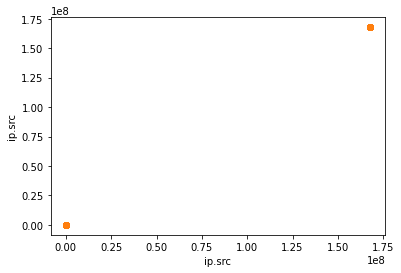

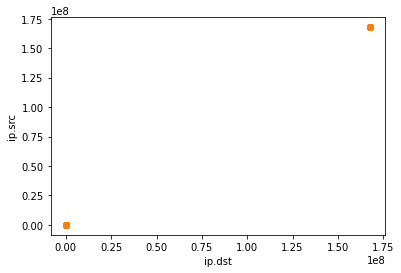

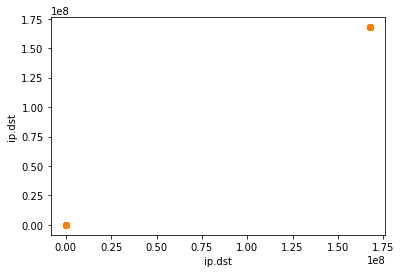

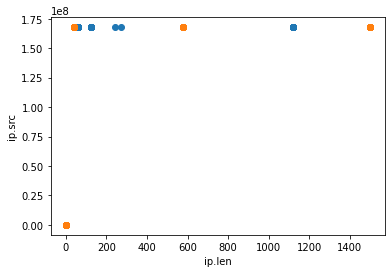

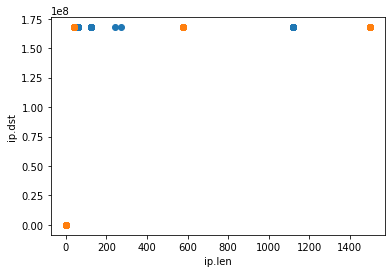

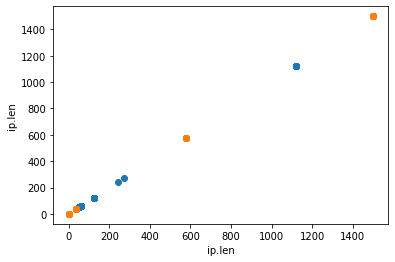

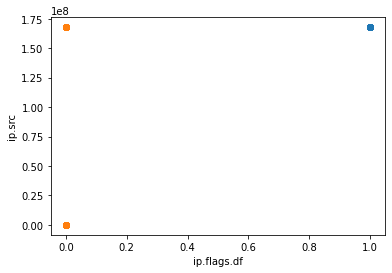

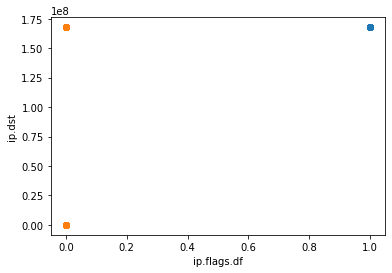

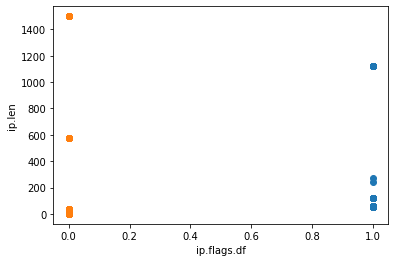

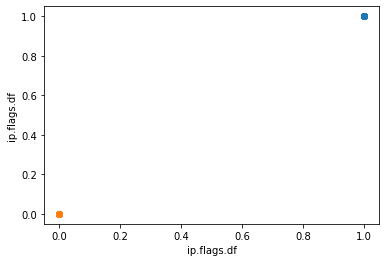

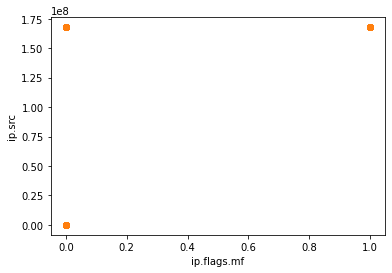

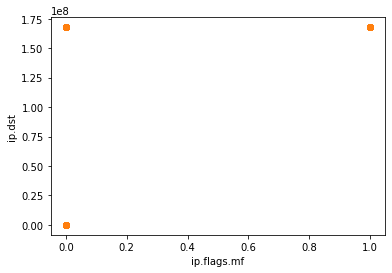

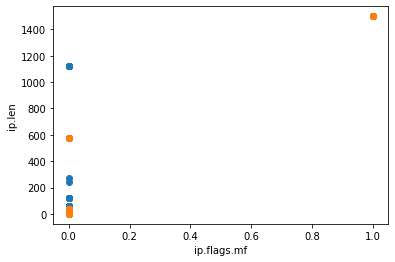

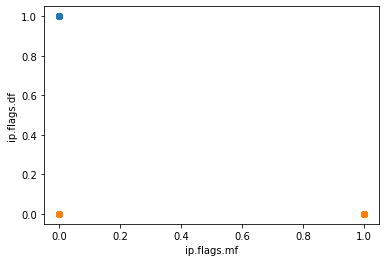

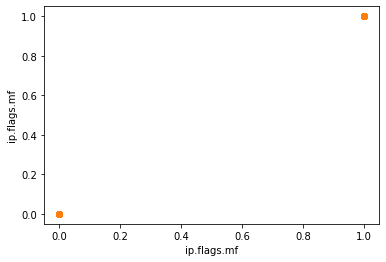

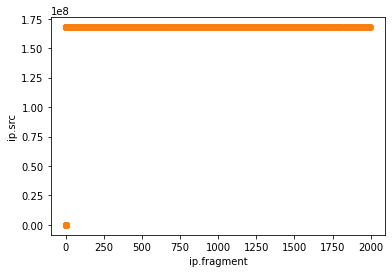

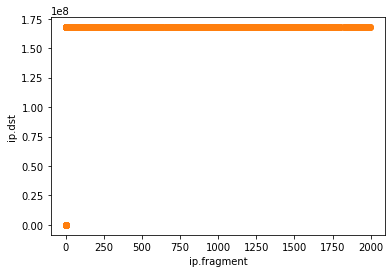

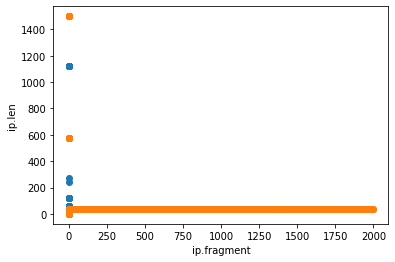

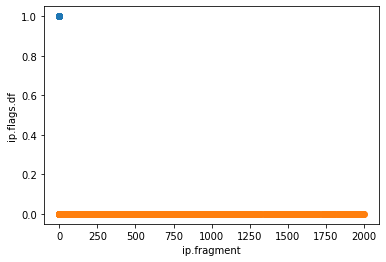

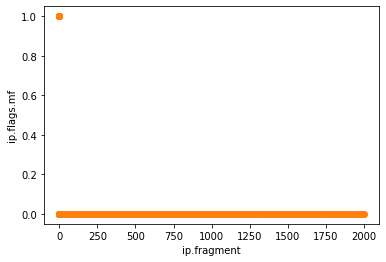

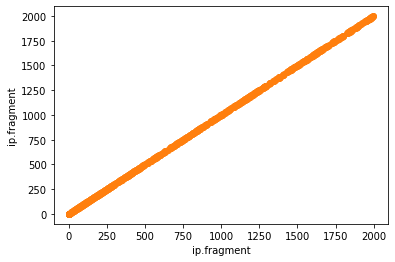

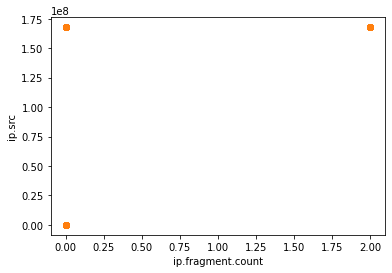

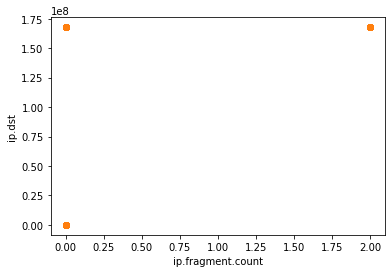

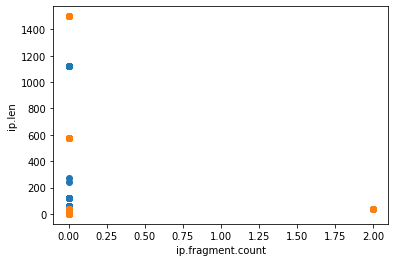

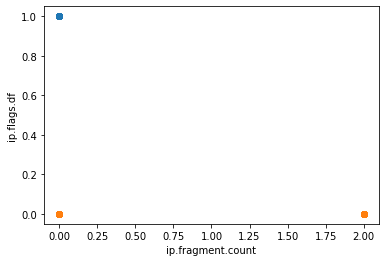

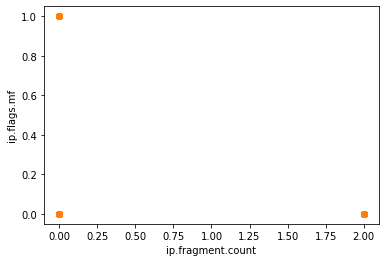

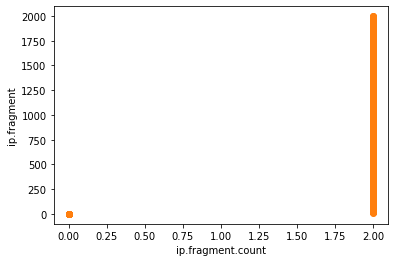

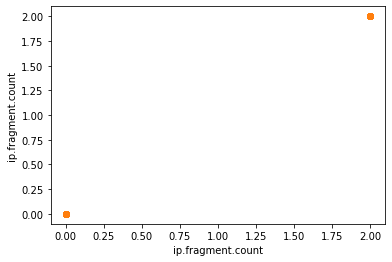

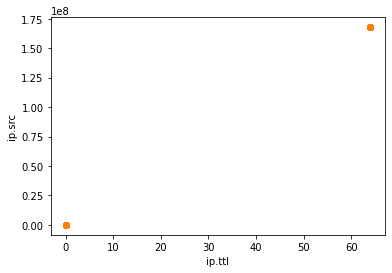

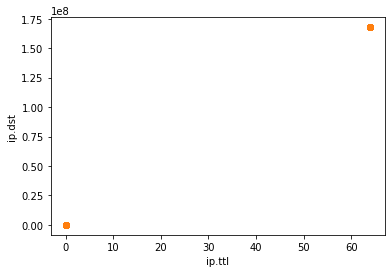

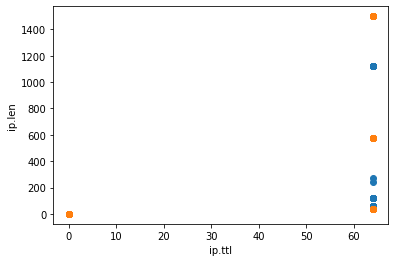

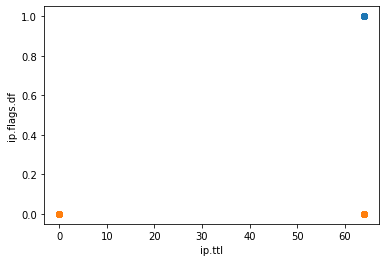

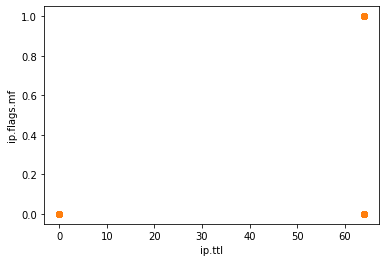

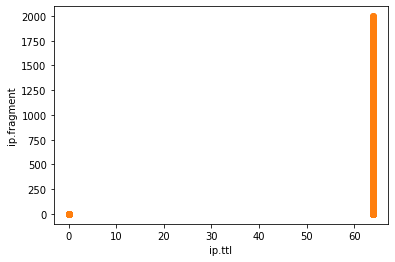

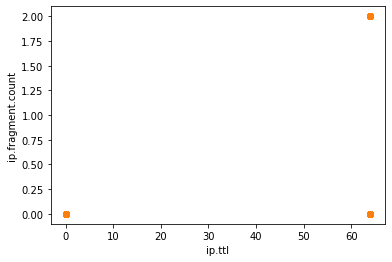

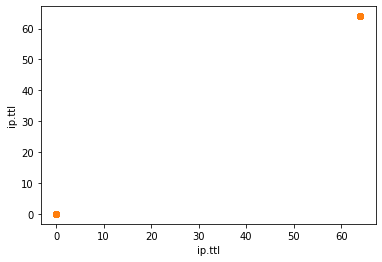

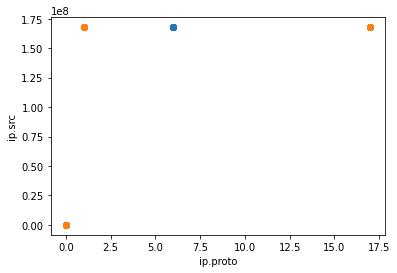

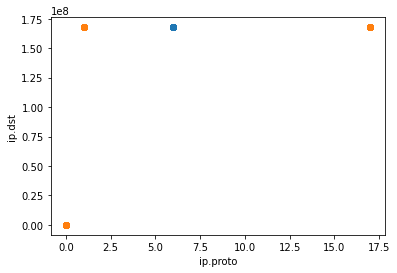

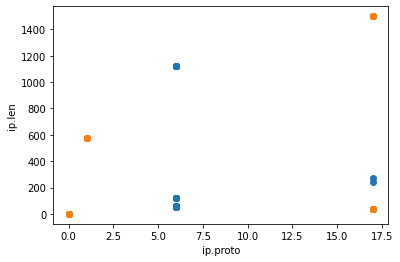

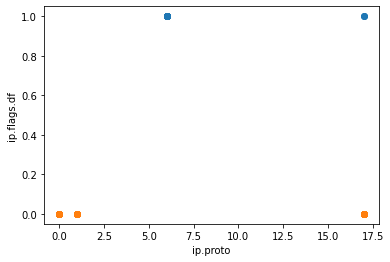

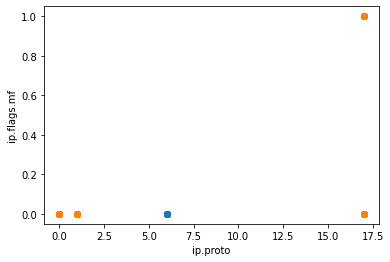

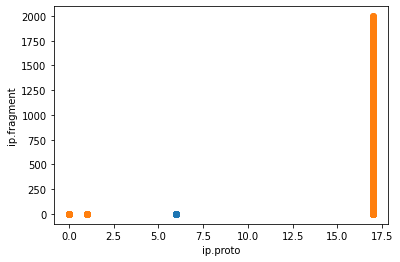

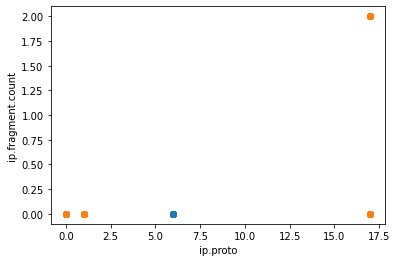

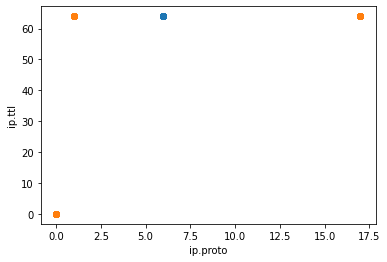

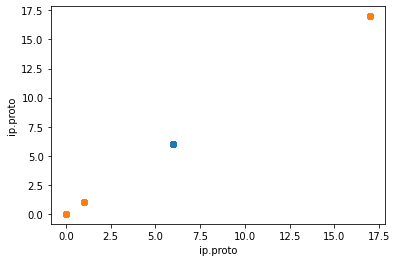

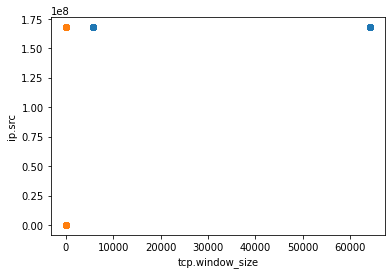

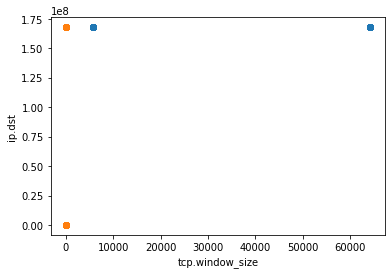

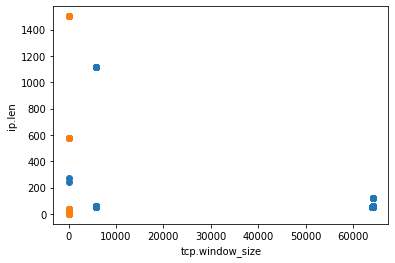

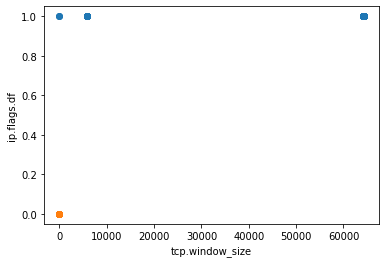

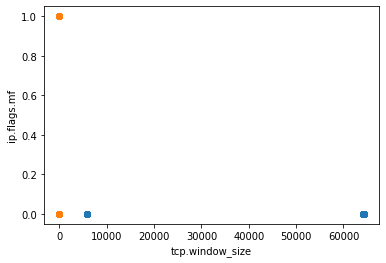

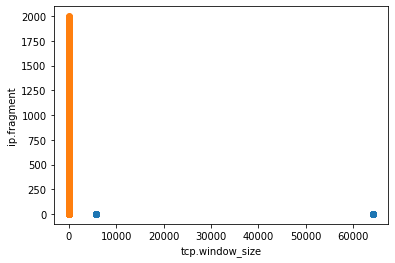

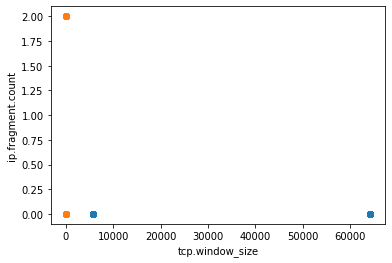

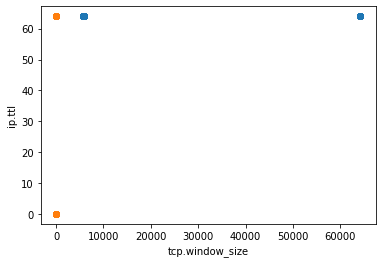

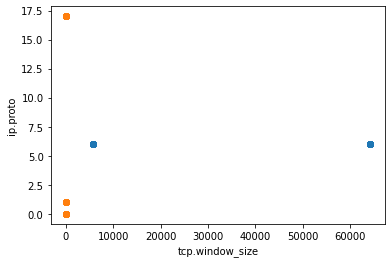

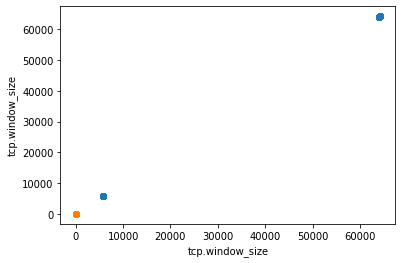

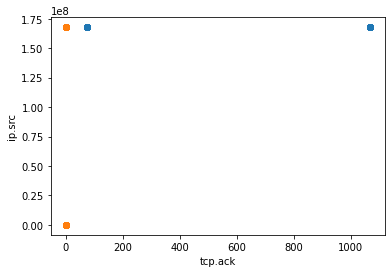

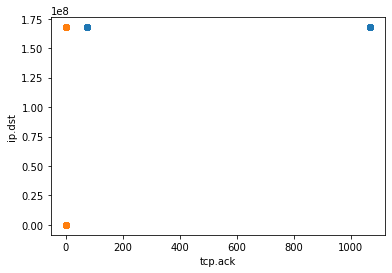

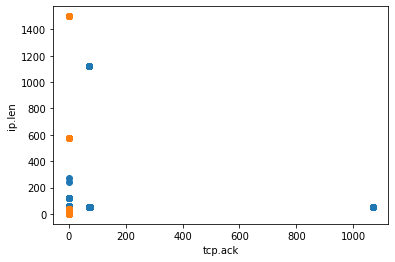

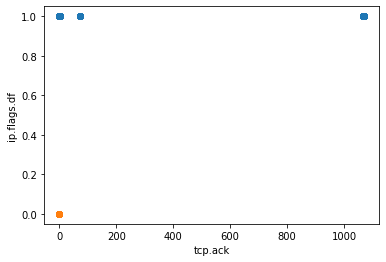

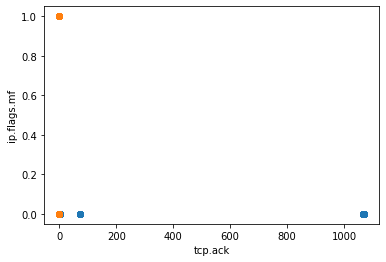

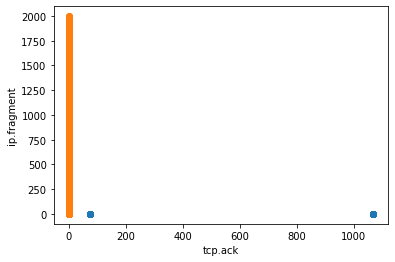

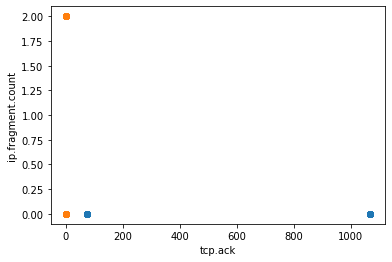

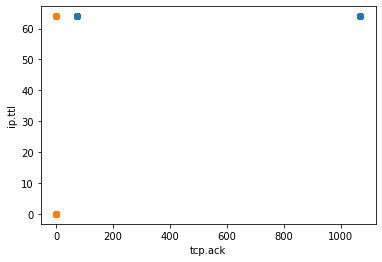

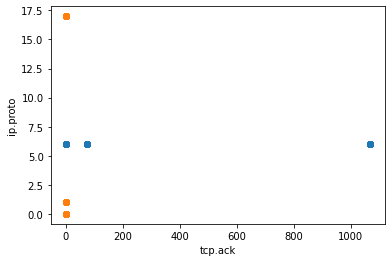

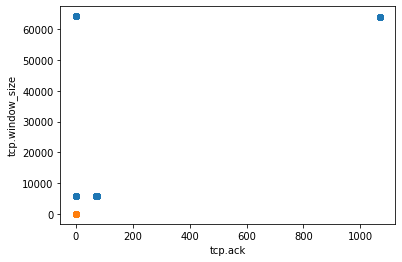

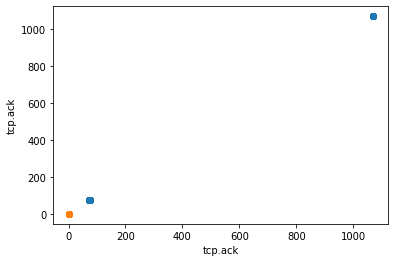

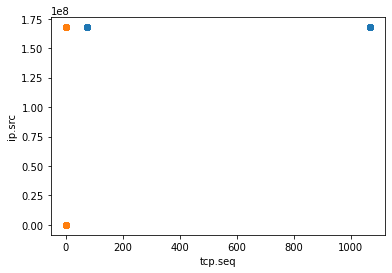

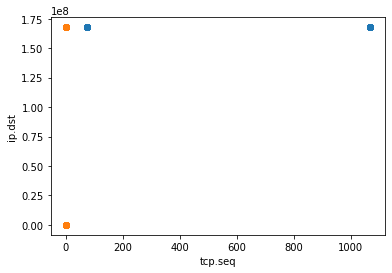

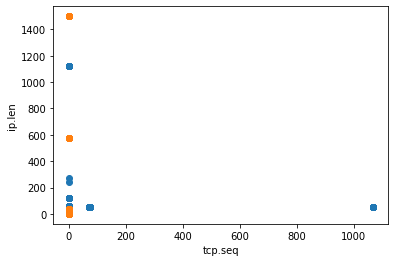

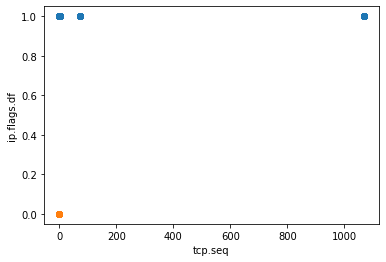

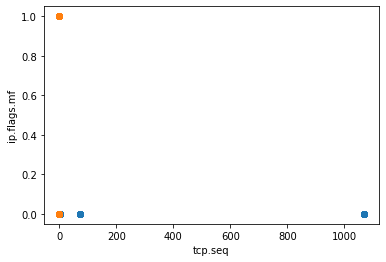

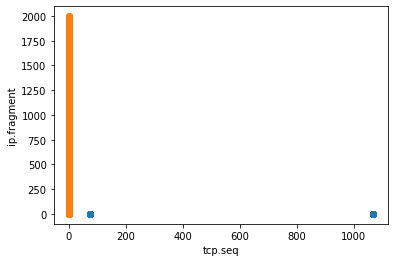

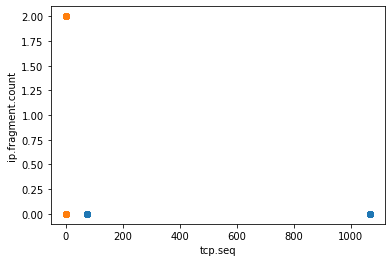

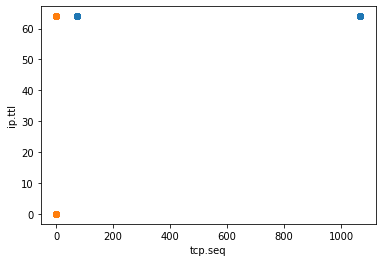

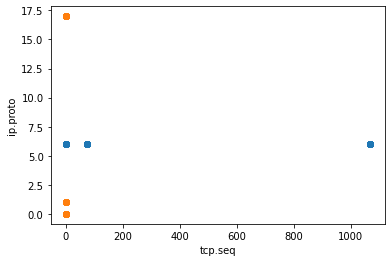

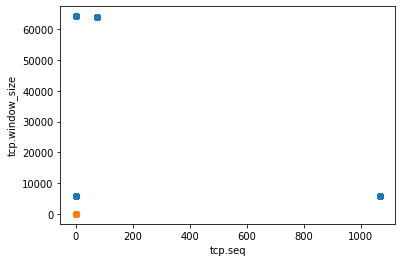

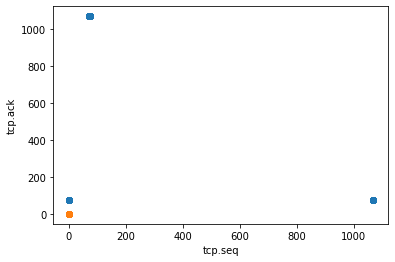

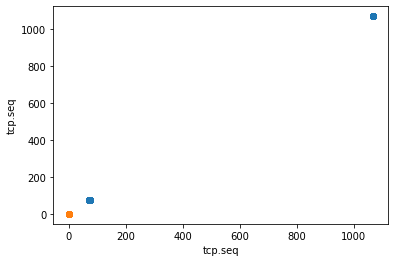

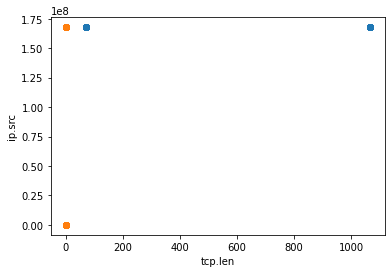

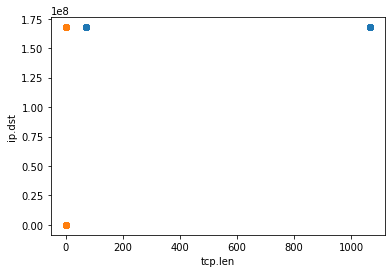

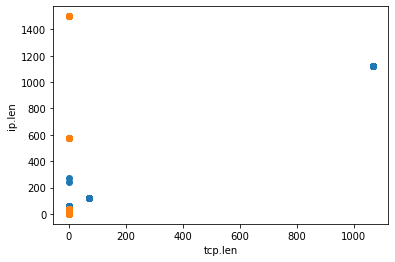

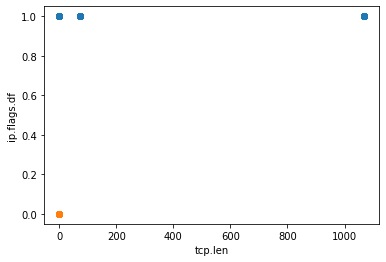

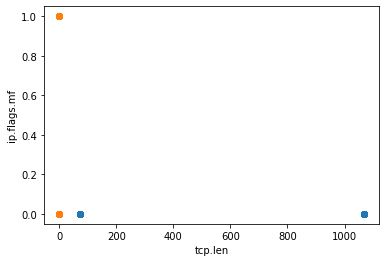

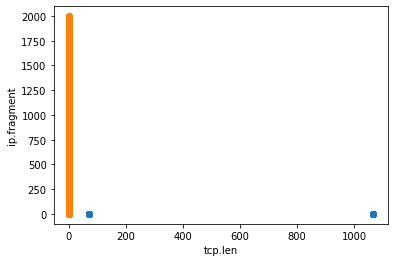

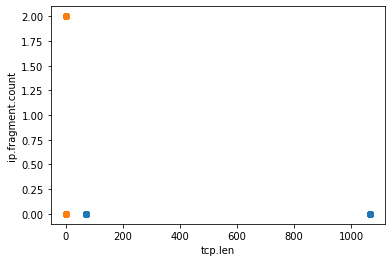

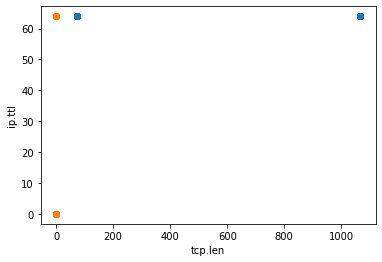

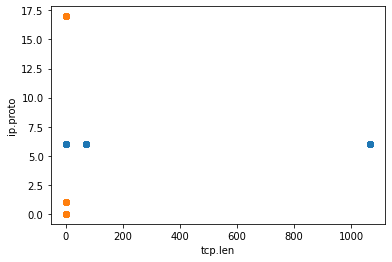

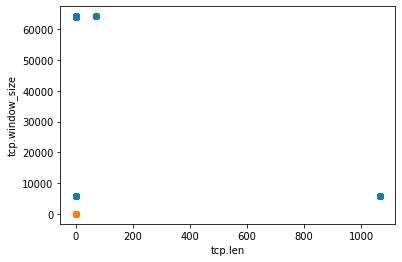

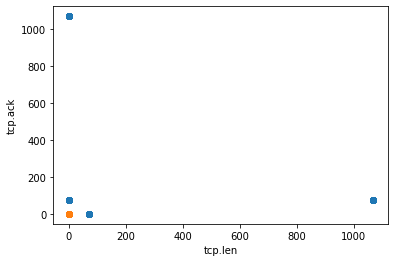

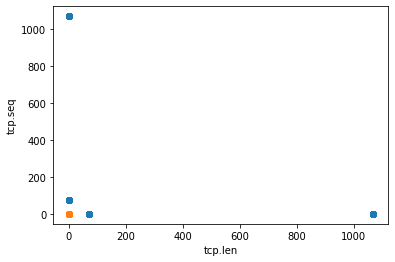

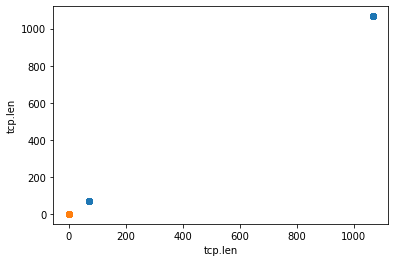

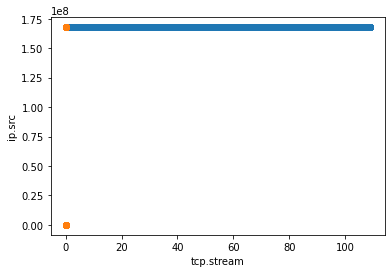

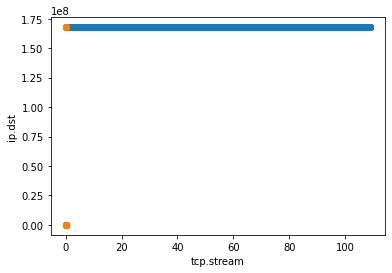

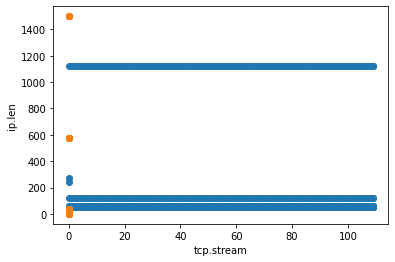

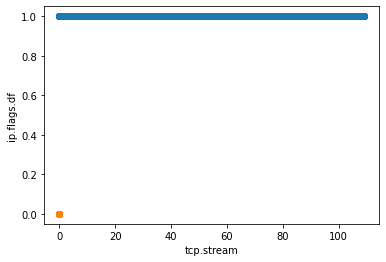

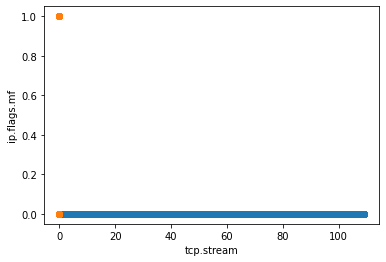

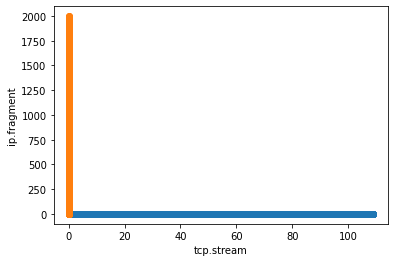

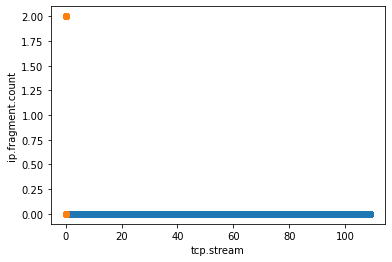

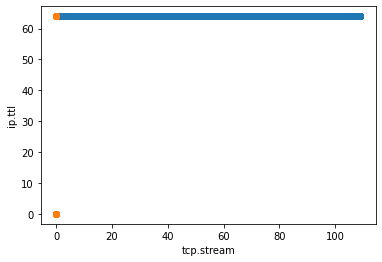

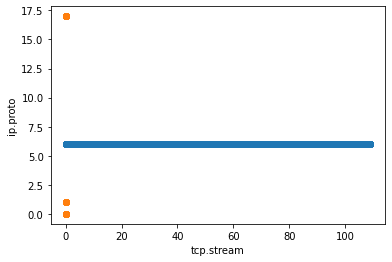

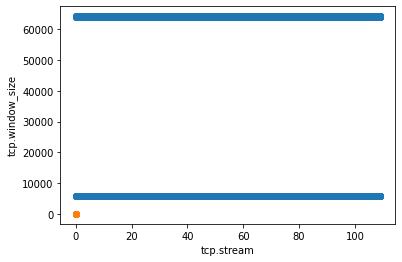

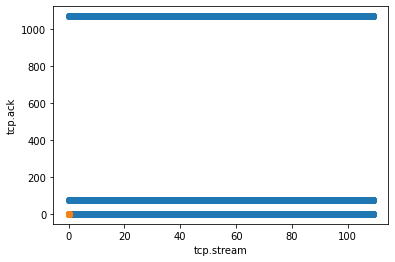

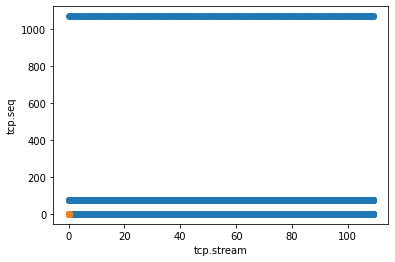

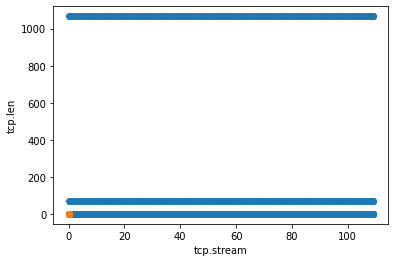

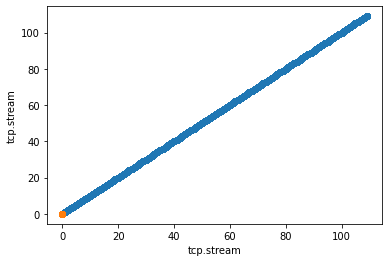

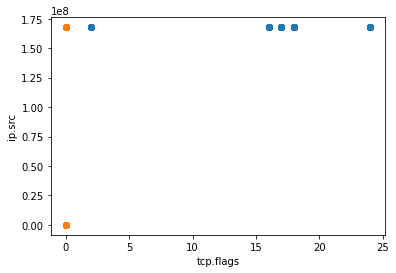

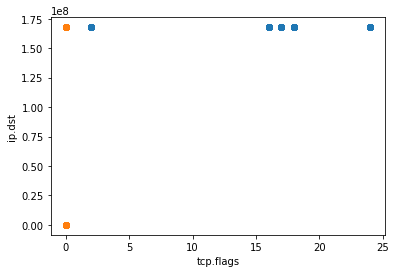

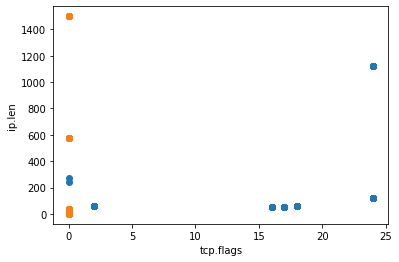

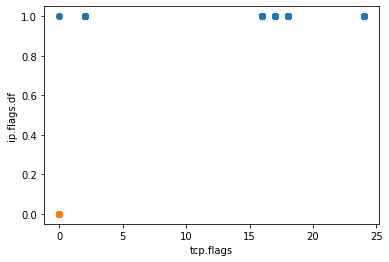

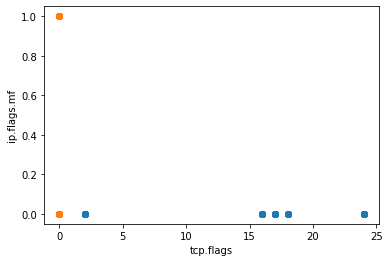

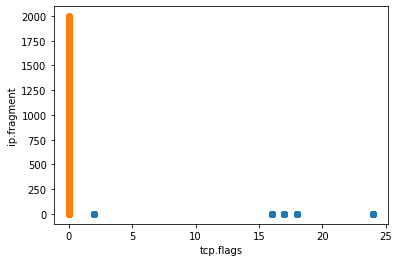

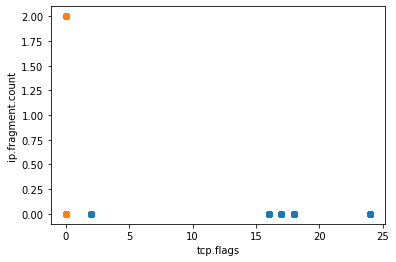

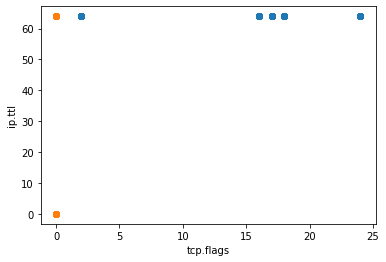

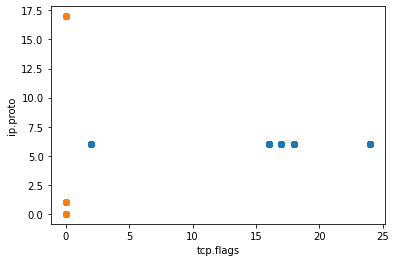

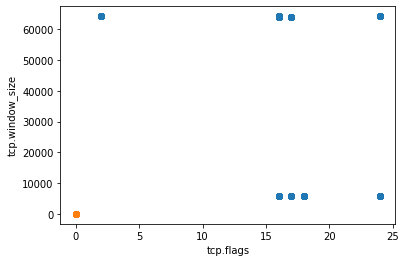

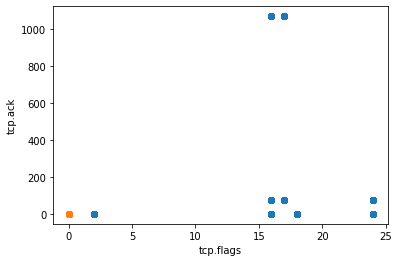

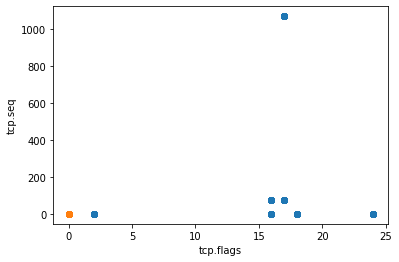

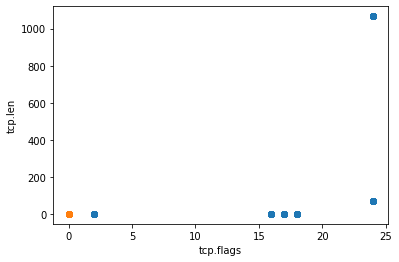

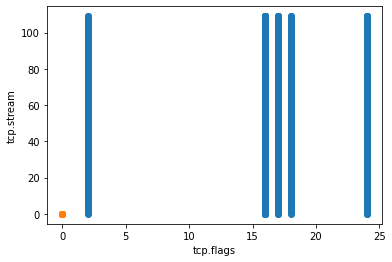

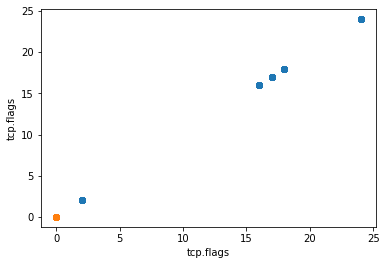

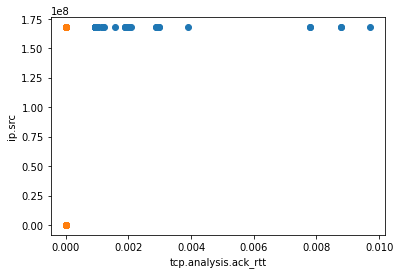

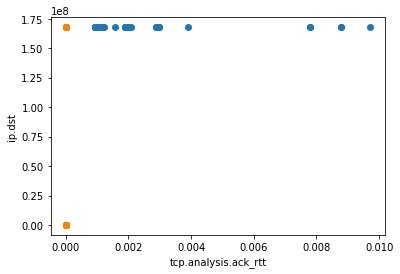

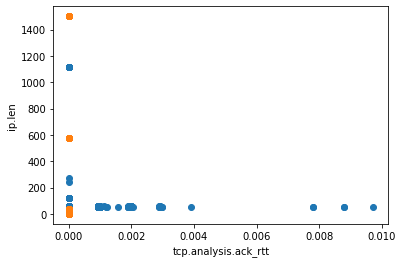

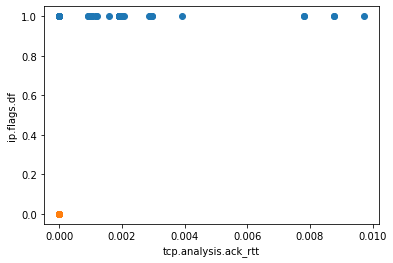

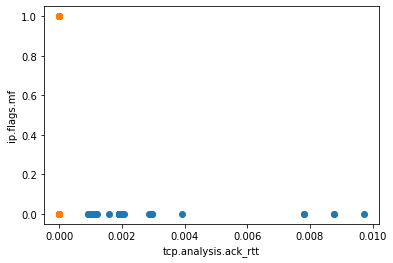

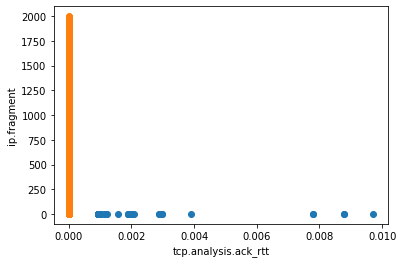

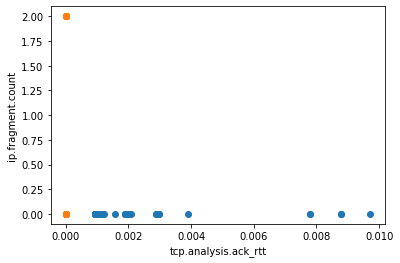

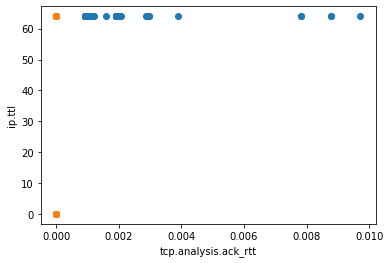

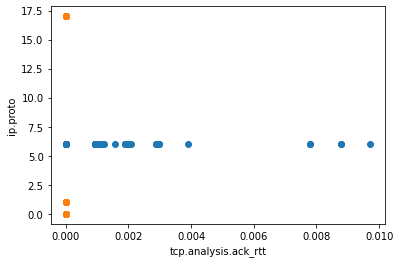

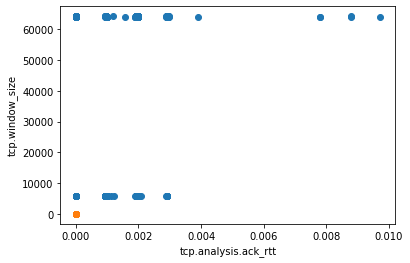

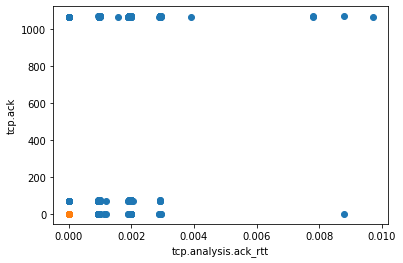

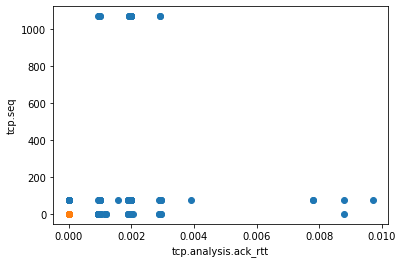

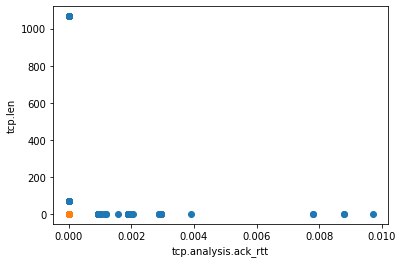

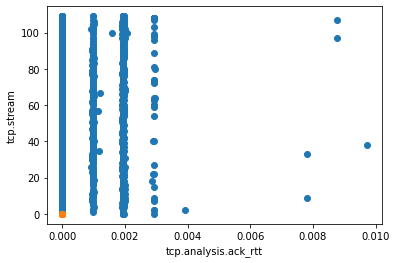

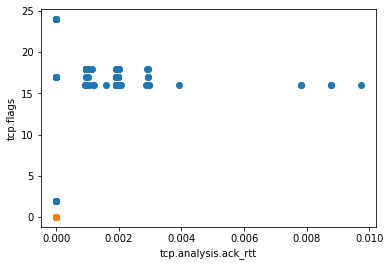

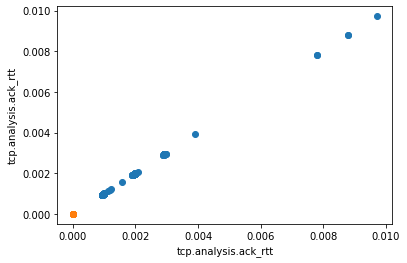

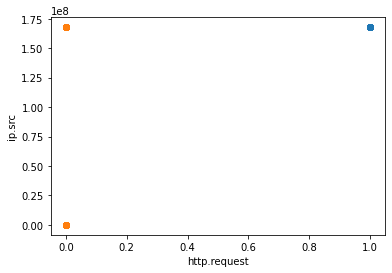

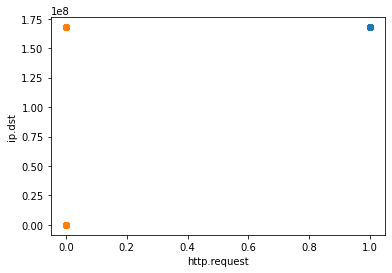

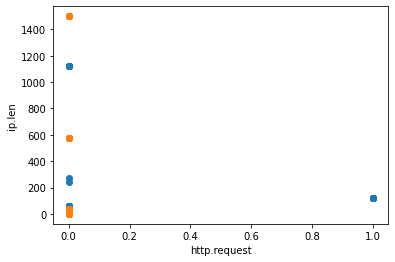

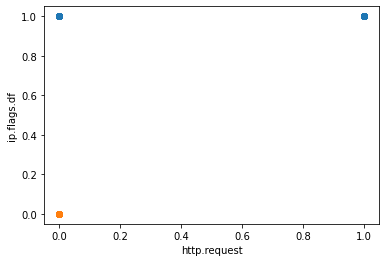

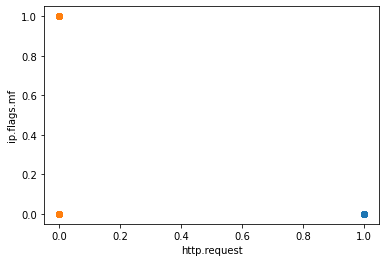

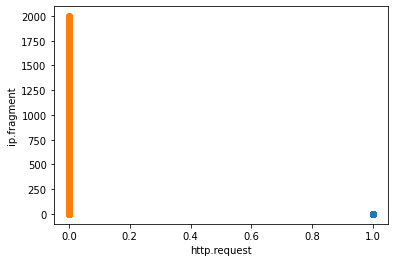

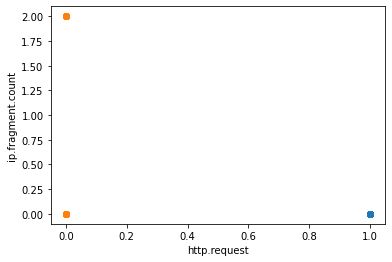

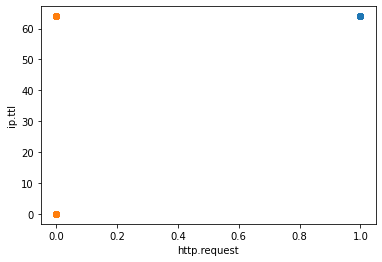

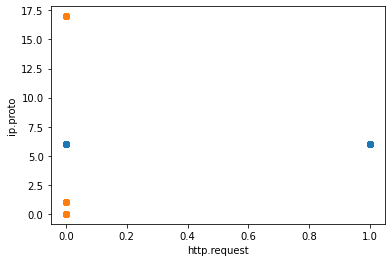

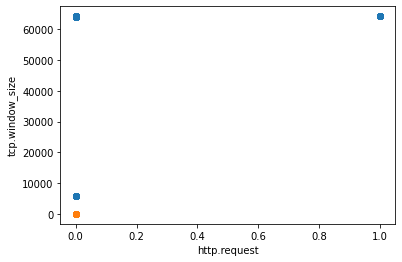

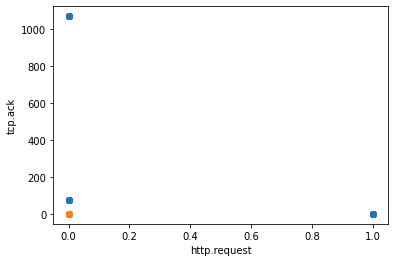

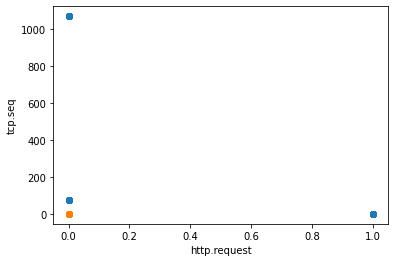

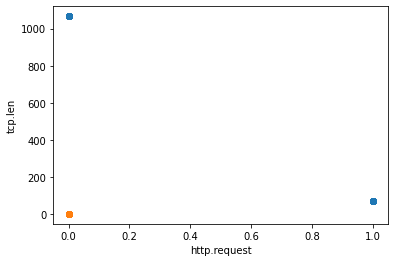

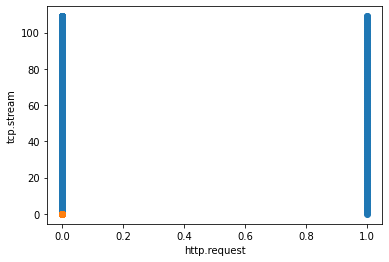

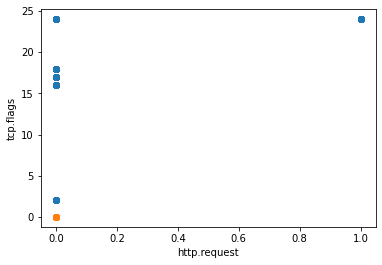

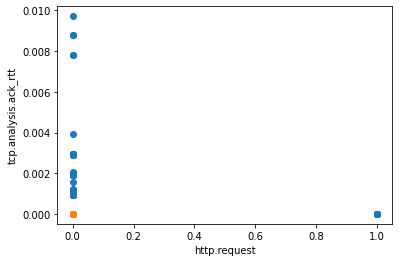

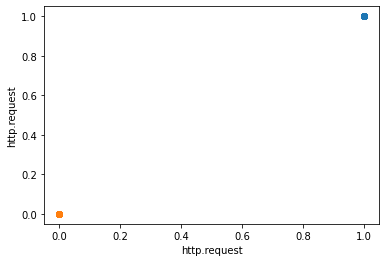

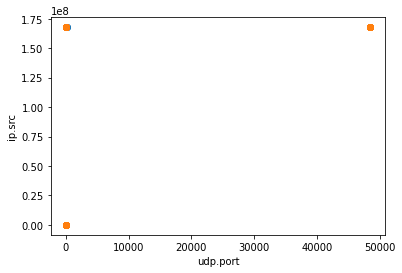

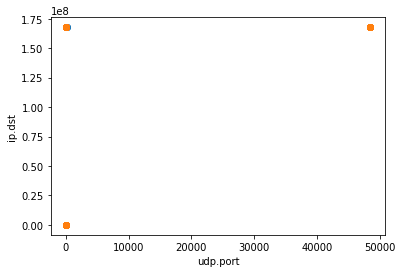

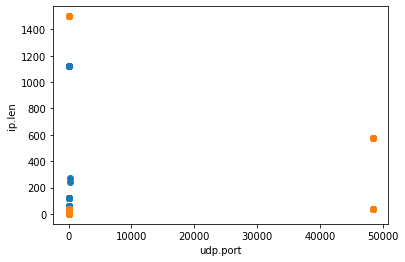

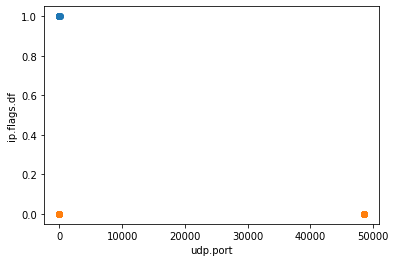

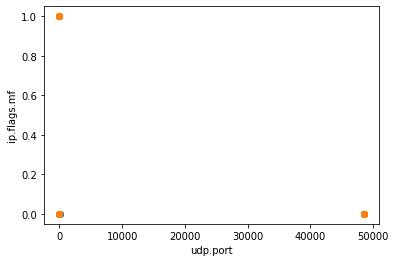

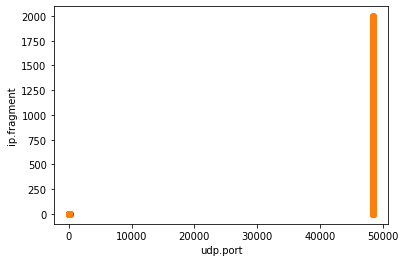

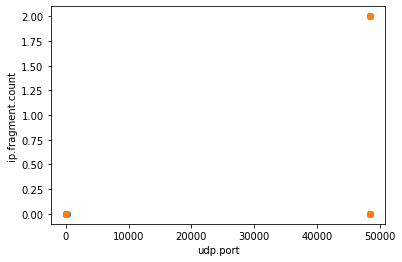

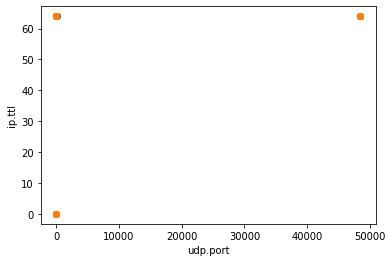

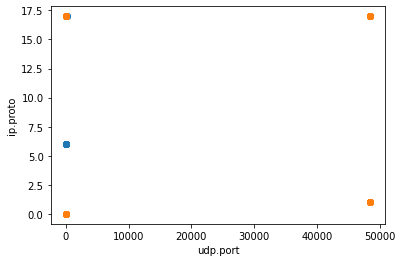

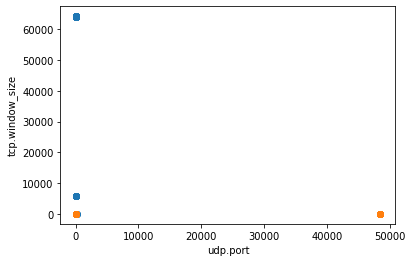

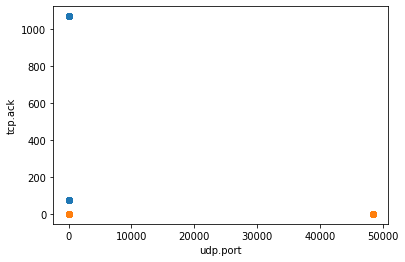

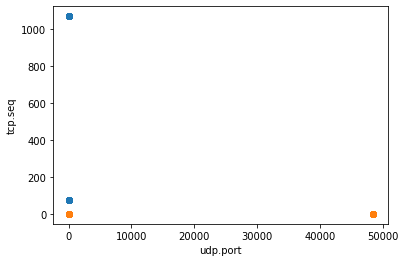

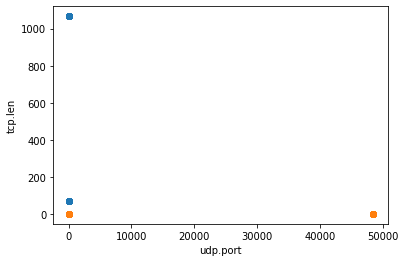

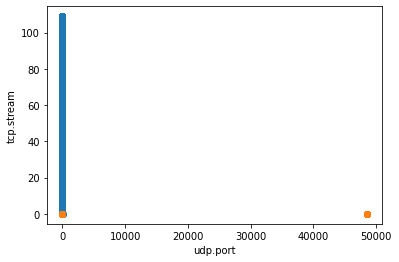

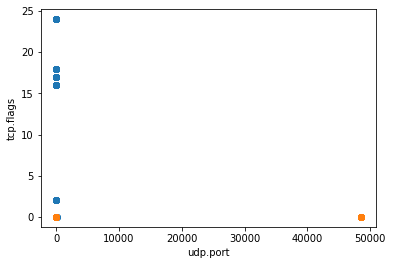

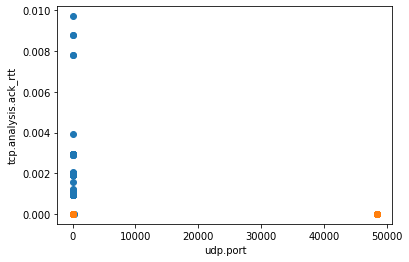

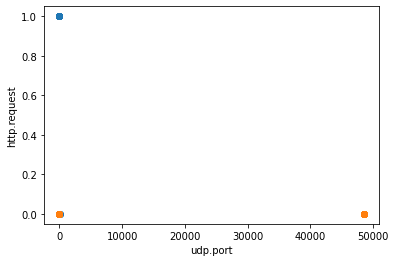

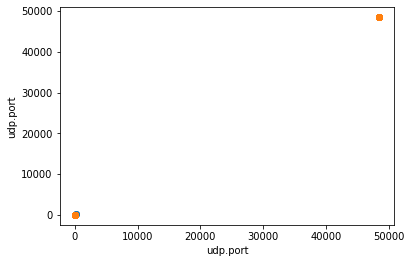

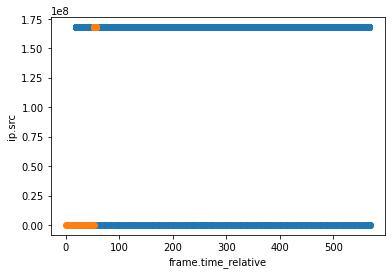

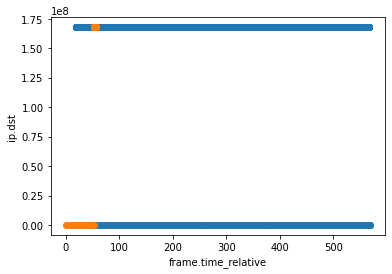

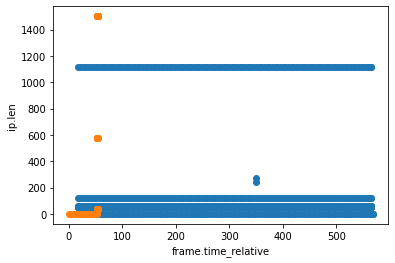

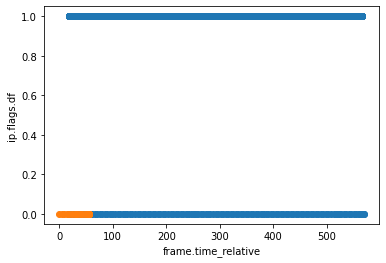

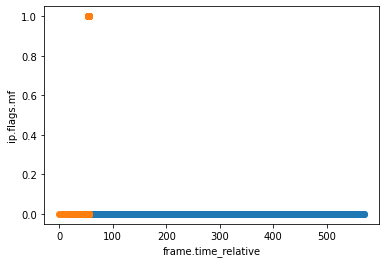

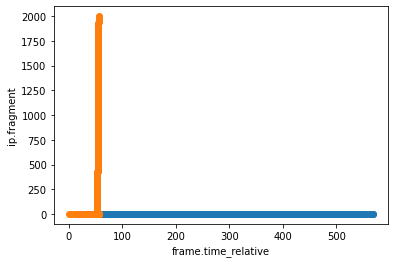

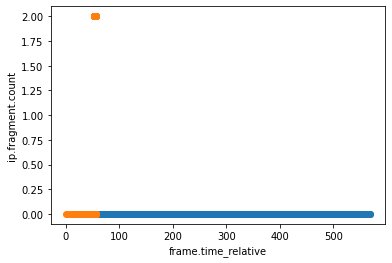

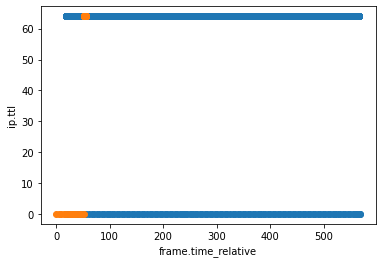

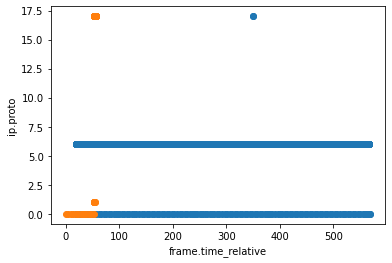

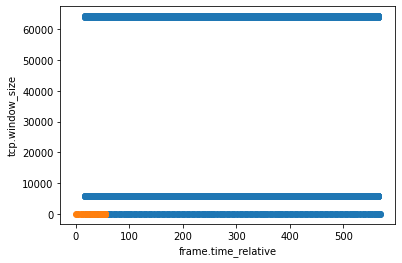

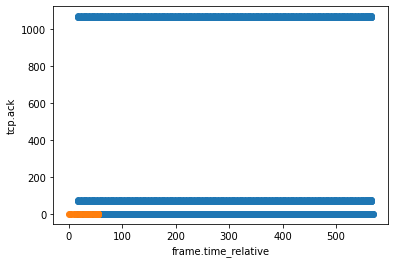

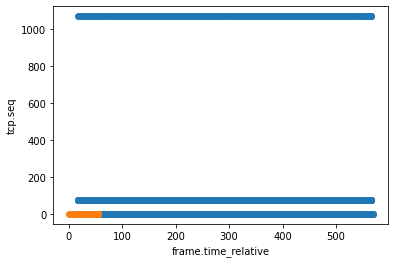

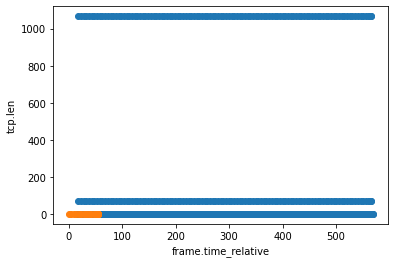

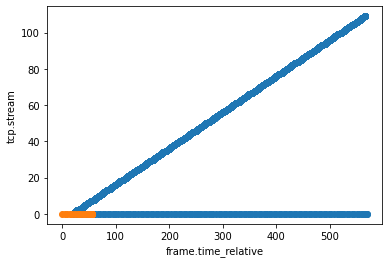

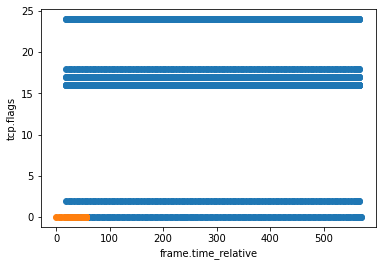

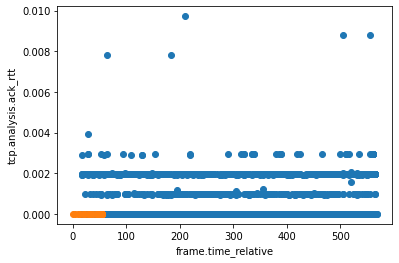

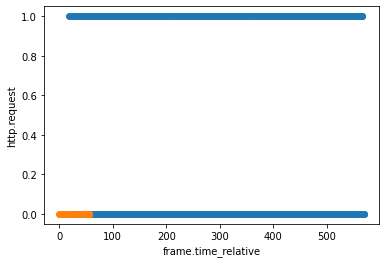

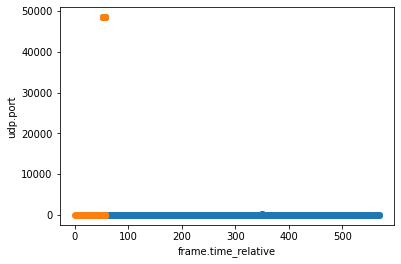

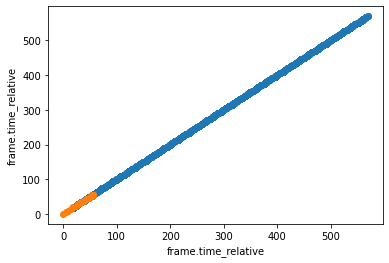

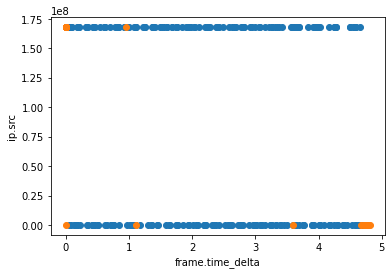

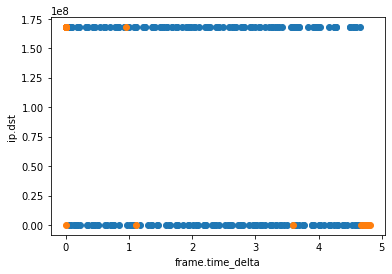

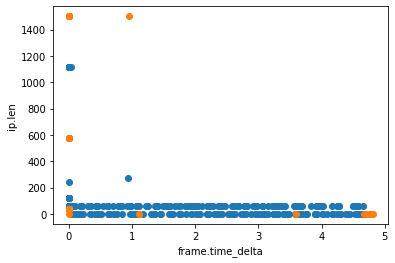

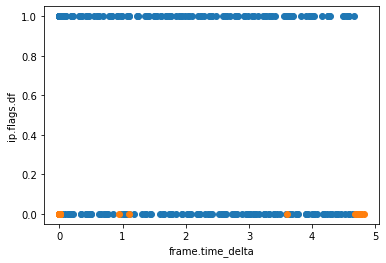

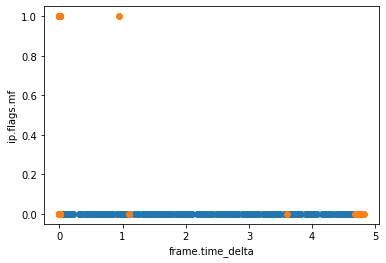

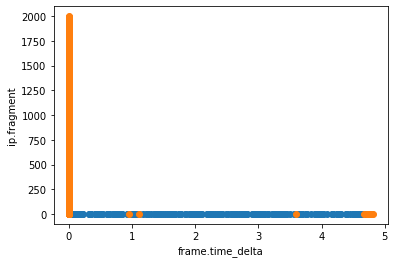

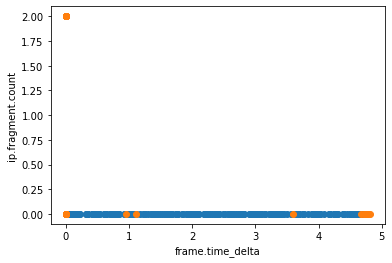

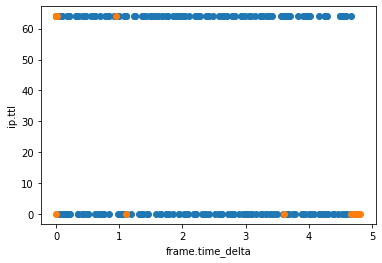

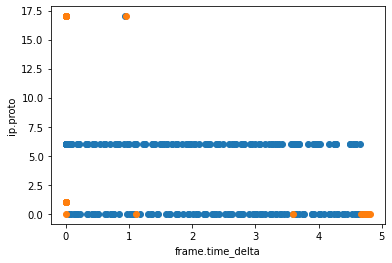

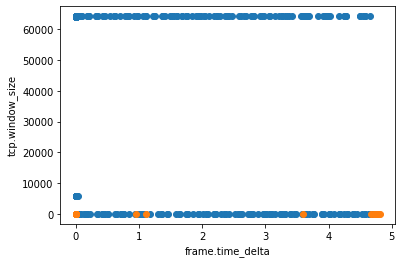

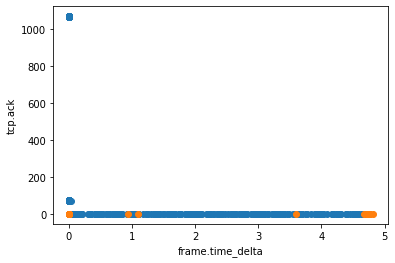

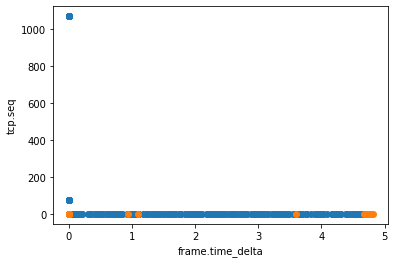

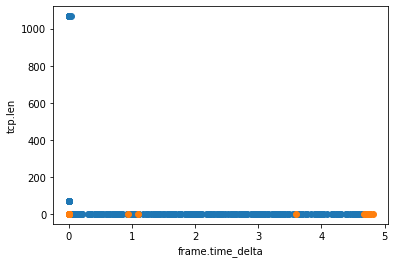

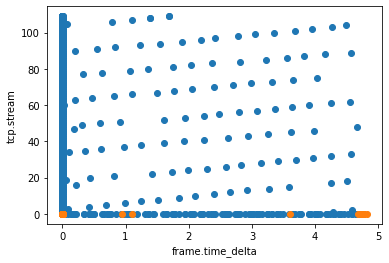

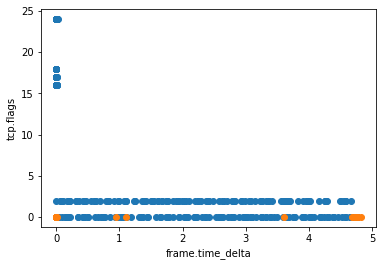

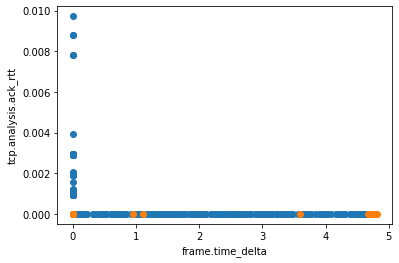

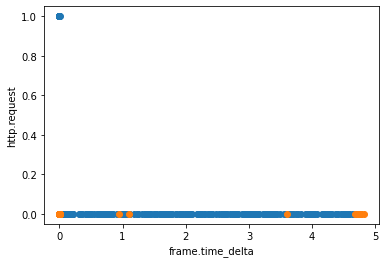

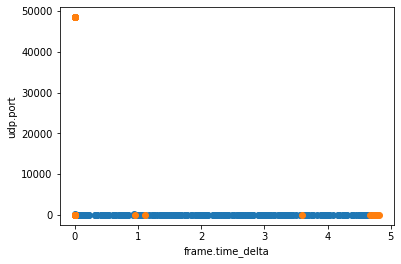

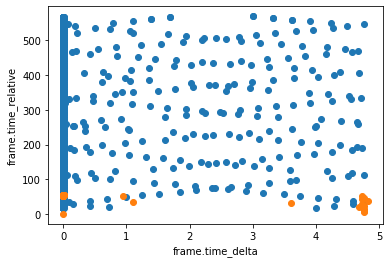

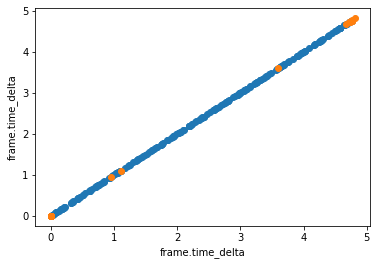

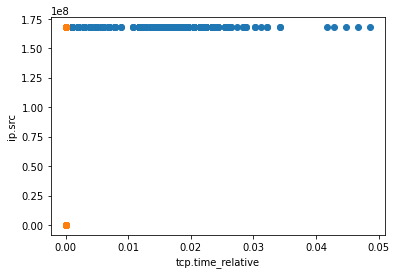

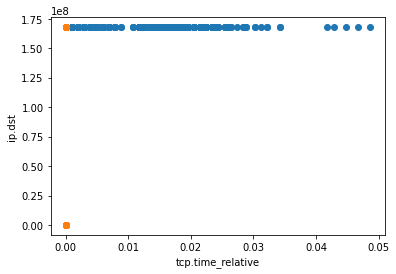

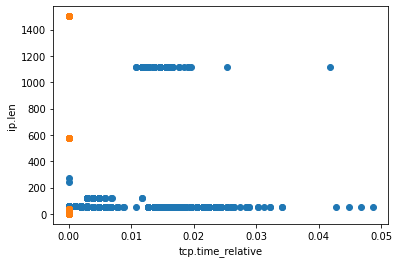

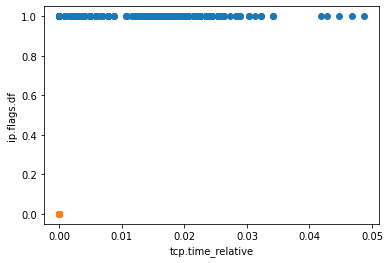

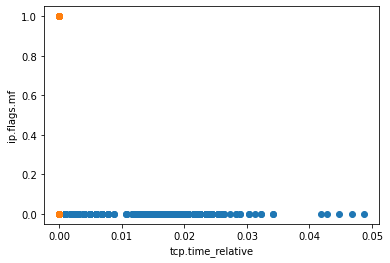

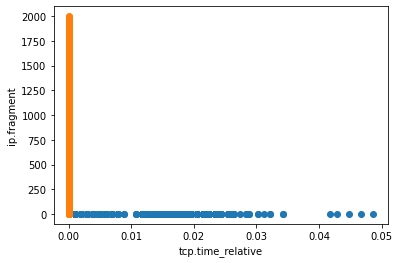

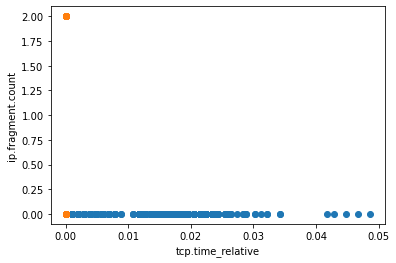

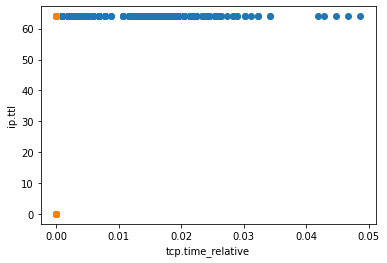

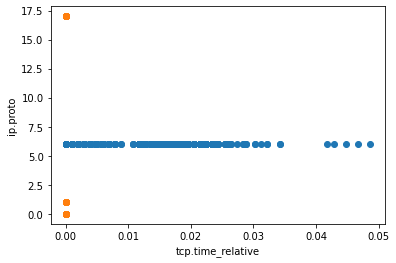

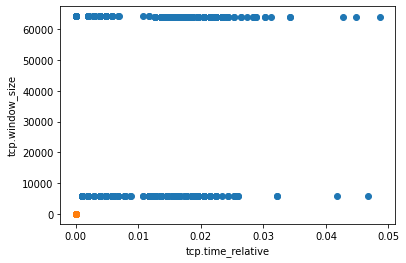

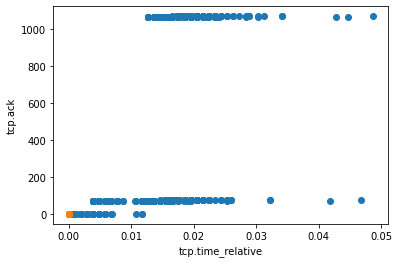

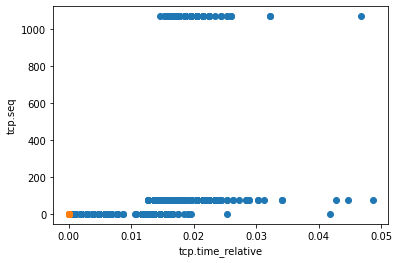

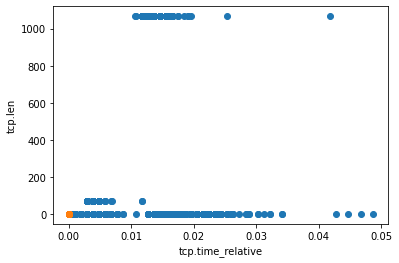

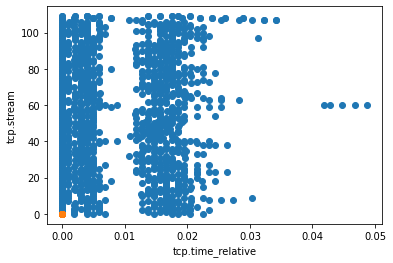

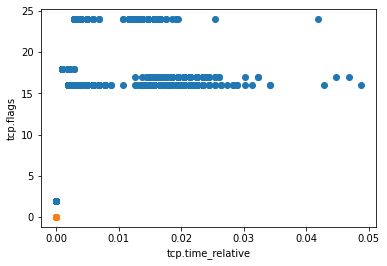

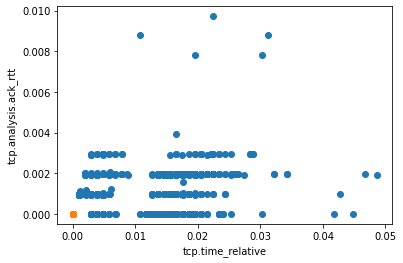

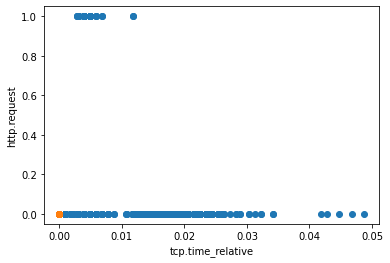

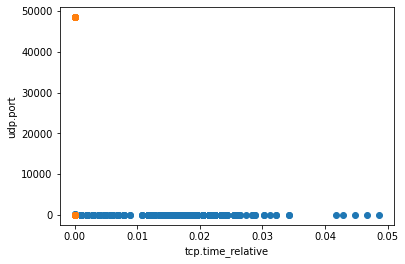

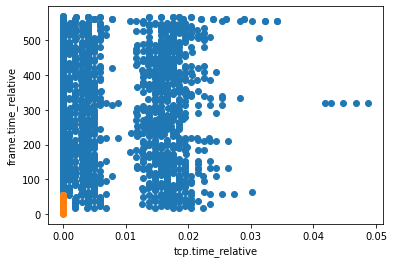

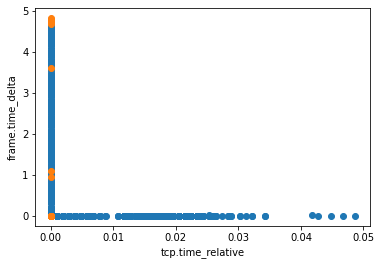

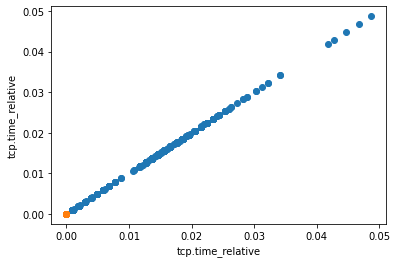

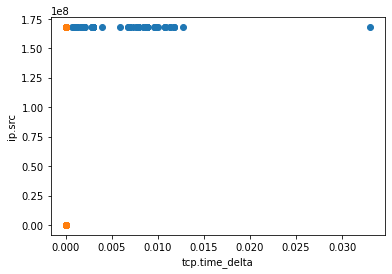

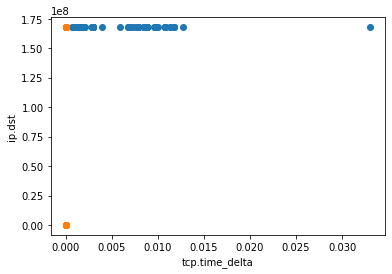

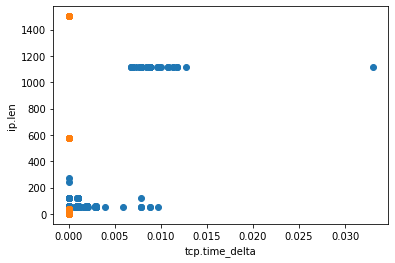

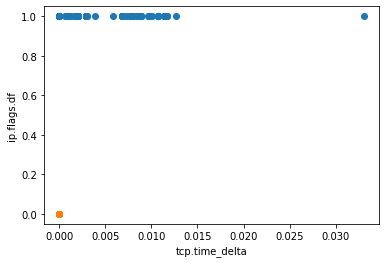

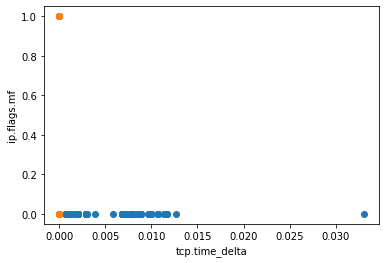

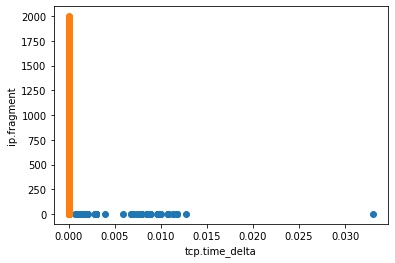

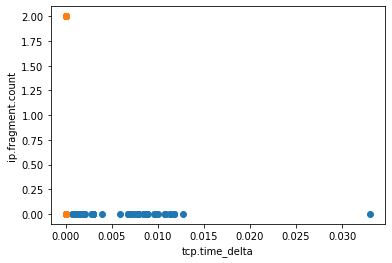

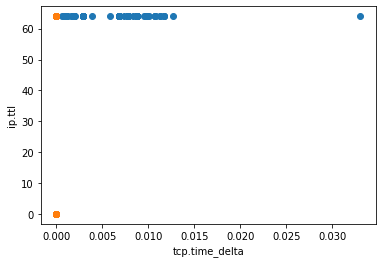

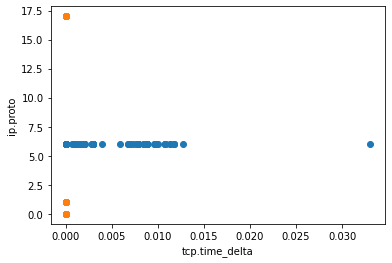

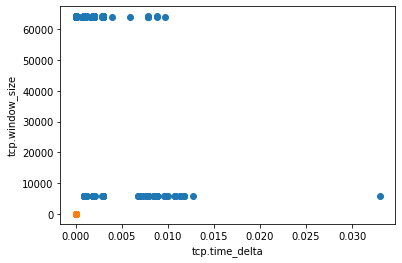

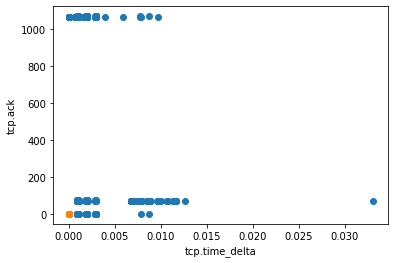

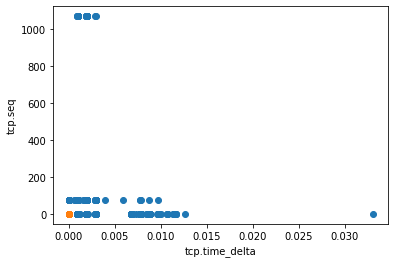

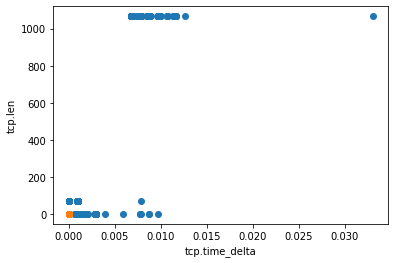

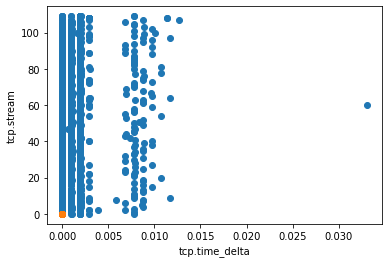

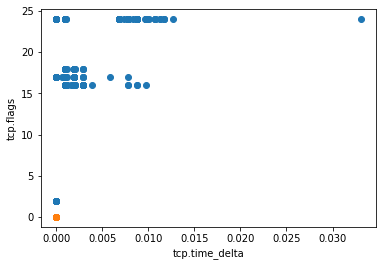

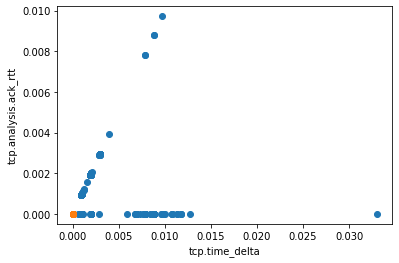

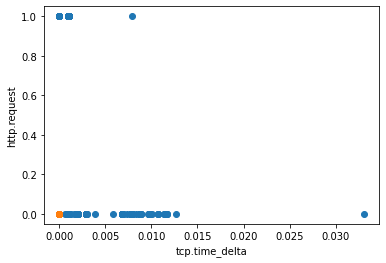

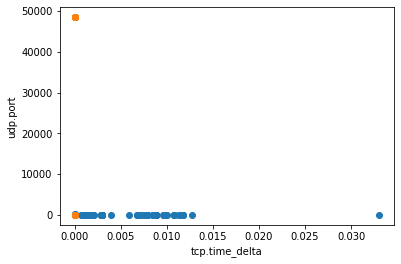

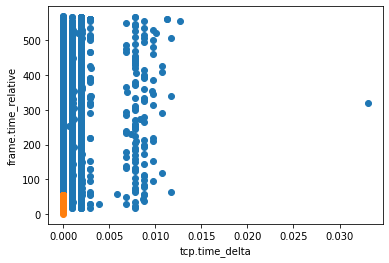

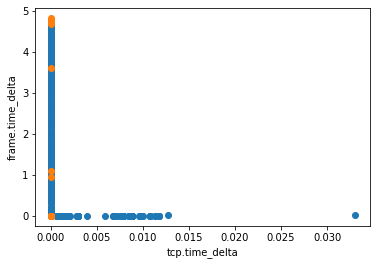

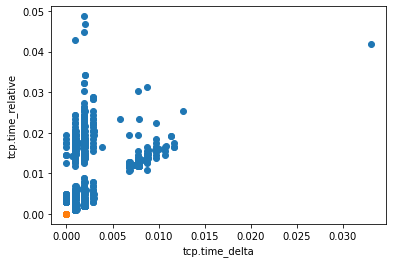

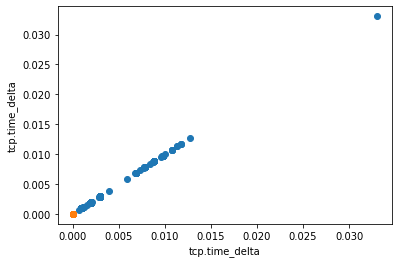

In [85]:
print("\n ")
print("COMPARUNG RELATION BETWEEN EACH COUPLE OF FEATURE")
safe = np.array(data['label'] == 'benign')
# attc = data['label'] == 'ddos'
attc = np.invert(safe)
n_f = len(data.iloc[0])
for i in range(n_f-1):
  for j in range(i+1):
    plt.scatter(data.iloc[safe,i],data.iloc[safe,j])
    plt.scatter(data.iloc[attc,i],data.iloc[attc,j])
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[j])
    plt.show()
print("\n")
print(100*"-")
print("\n")



----------------------------------------------------------------------------------------------------

 PLOTING THE SCATTER MATRIX (LAST PLOTS IN ONE VIEWE)


----------------------------------------------------------------------------------------------------




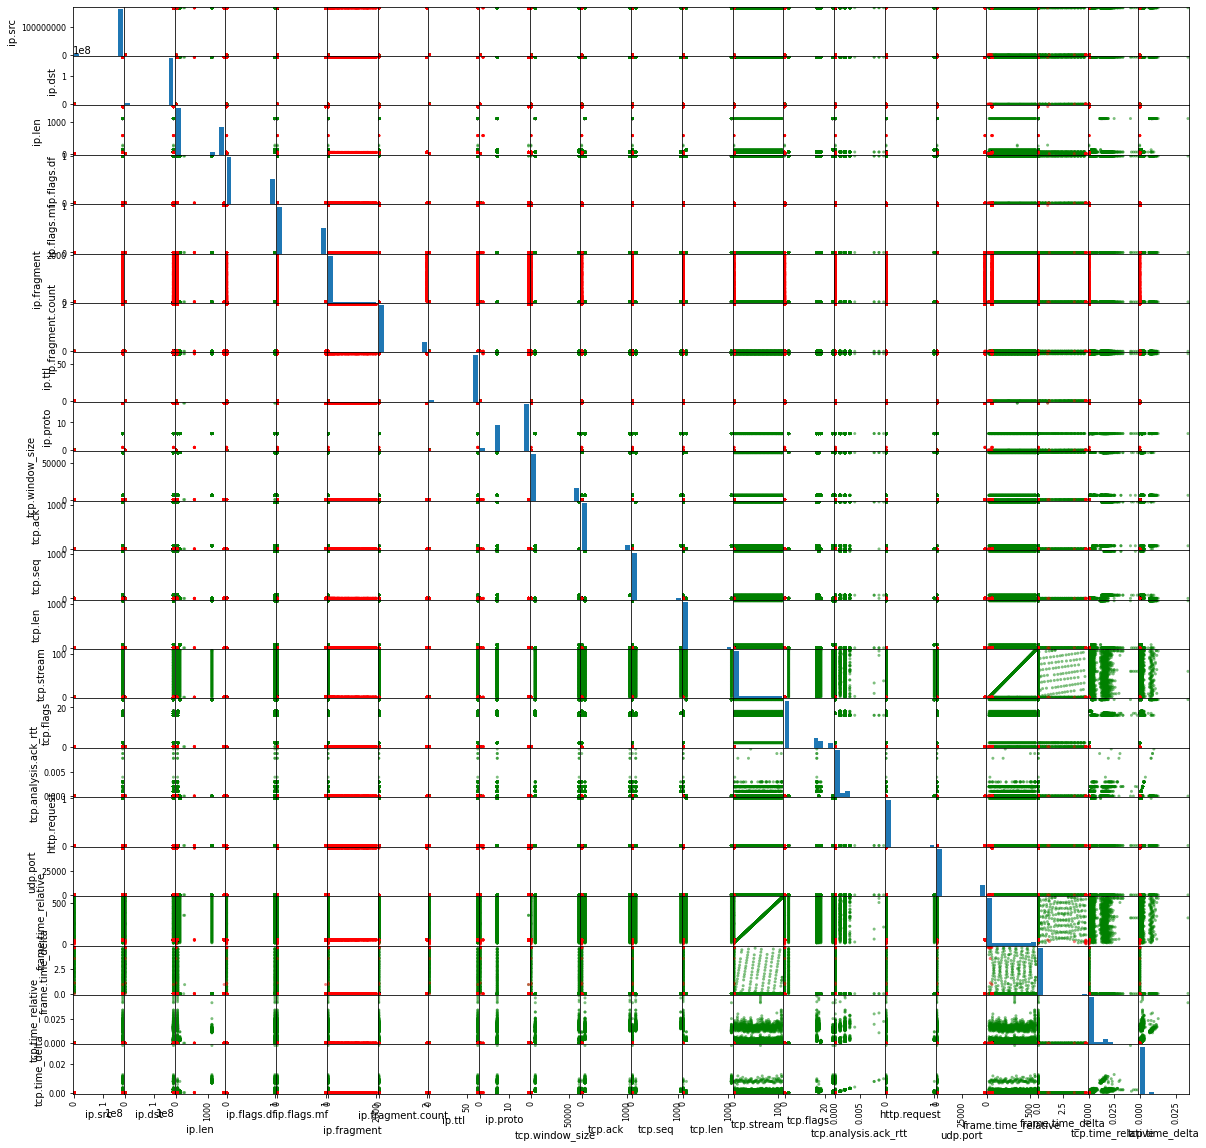

In [91]:
print("\n")
print(100*"-")
print("\n PLOTING THE SCATTER MATRIX (LAST PLOTS IN ONE VIEWE)")
C =  ['r' if x=='ddos' else 'g' for x in data.label]
pd.plotting.scatter_matrix(data, figsize=(20,20), c = C);
print("\n")
print(100*"-")
print("\n")

In [92]:
print("\n")
print(100*"-")
print("\n FINDING THE MUTUAL INFORMATION\n")
I = np.zeros(n_f-1)
for i in range(n_f-1):
  minn,maxx = data.iloc[:,i].min(),data.iloc[:,i].max()
  Sa,Sax = np.histogram(np.array(data.iloc[safe,i]),range=(minn,maxx),bins=20)
  At,Atx = np.histogram(np.array(data.iloc[attc,i]),range=(minn,maxx),bins=20)
  c = (Sa+At)
  c_s = c.sum()
  nz = Sa!=0
  if nz.any():
    I[i] = (Sa[nz]/c_s*np.log2((Sa[nz]/c_s)/(Sa.sum()/c_s)/(c[nz]/c_s))).sum()
  nz = At!=0
  if nz.any():
    I[i] += (At[nz]/c_s*np.log2((At[nz]/c_s)/(At.sum()/c_s)/(c[nz]/c_s))).sum()
#   plt.scatter(Sax[:-1],Sa)
#   plt.scatter(Atx[:-1],At)
#   plt.xlabel(data.columns[i])
#   plt.ylabel('#')
#   plt.show()



----------------------------------------------------------------------------------------------------

 FINDING THE MUTUAL INFORMATION



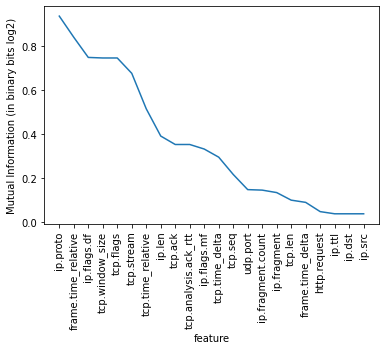

In [93]:
plt.plot(np.flip(np.sort(I)))
plt.xlabel('feature')
plt.xticks(range(n_f-1),data.columns[np.flip(np.argsort(I))],rotation='vertical')
plt.ylabel('Mutual Information (in binary bits log2)')
plt.show()

In [97]:
print("\n")
print(100*"-")
COLUMN = []
print("\n LIST OF THE BEST FEATURES \n")
print ("{:<25} {:<15} ".format('feature','Mutual Information (in binary bits log2)'))
for i in np.flip(np.argsort(I)):
    COLUMN.append(data.columns[i])
    print("{:<25} {:<15}".format(data.columns[i],np.round(I[i],3)))



----------------------------------------------------------------------------------------------------

 LIST OF THE BEST FEATURES 

feature                   Mutual Information (in binary bits log2) 
ip.proto                  0.935          
frame.time_relative       0.839          
ip.flags.df               0.748          
tcp.window_size           0.745          
tcp.flags                 0.745          
tcp.stream                0.676          
tcp.time_relative         0.515          
ip.len                    0.391          
tcp.ack                   0.353          
tcp.analysis.ack_rtt      0.353          
ip.flags.mf               0.333          
tcp.time_delta            0.296          
tcp.seq                   0.217          
udp.port                  0.149          
ip.fragment.count         0.146          
ip.fragment               0.135          
tcp.len                   0.101          
frame.time_delta          0.091          
http.request              0.049          
i

In [111]:
prtub_features = ['ip.flags.df','ip.flags.mf','ip.len','ip.ttl','frame.time_delta','tcp.flags','label']
print(100*"-")
print("perturbing data are:\n")
print(prtub_features)
print(100*"-")
print('\n')

----------------------------------------------------------------------------------------------------


SHOWING HISTOGRAM OF PERTUBABLE FEATURE IN BENIGN DATA
----------------------------------------------------------------------------------------------------




Text(0.5, 0, 'ip.flags.df')

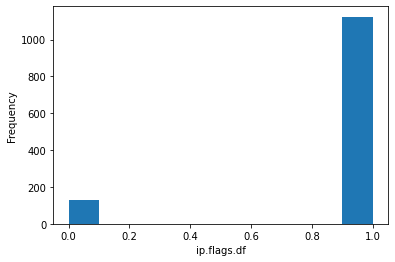

In [145]:
print(100*"-")
print('\n')
print("SHOWING HISTOGRAM OF PERTUBABLE FEATURE IN BENIGN DATA")
print(100*"-")
print('\n')
i = 0
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'ip.flags.mf')

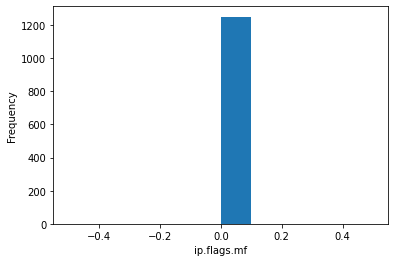

In [138]:
i = 1
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'ip.len')

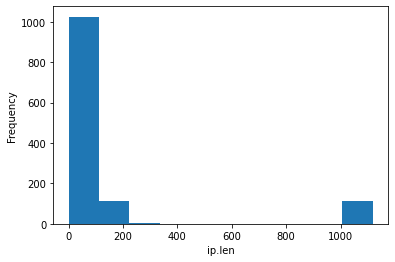

In [139]:
i = 2
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'ip.ttl')

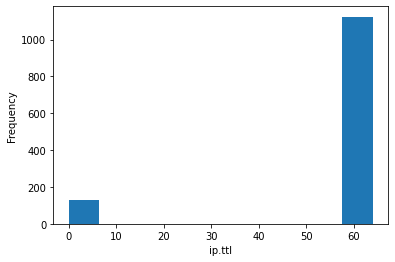

In [140]:
i = 3
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'frame.time_delta')

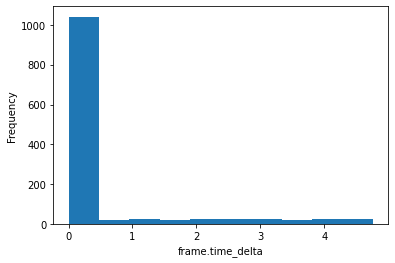

In [141]:
i = 4
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'tcp.flags')

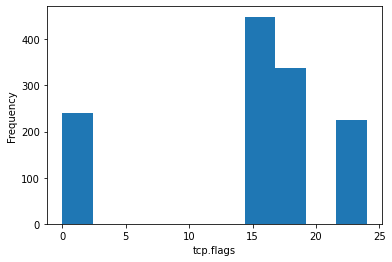

In [142]:
i = 5
ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0.5, 0, 'ip.len')

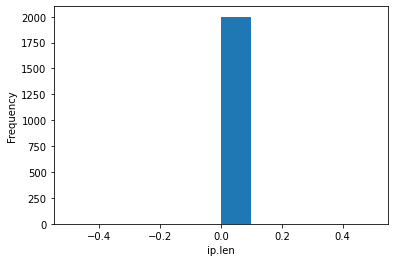

In [132]:
ax = data2['ip.flags.df'].plot(kind = 'hist')
ax.set_xlabel(f"{prtub_features[i]}")

Text(0, 0.5, 'number')

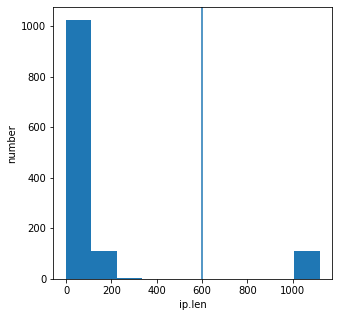

In [123]:

ax = data1[f'{prtub_features[i]}'].plot(kind = 'hist',figsize = (5,5))
ax.axvline(data[f'{prtub_features[i]}'].mean())
ax.set_xlabel(f"{prtub_features[i]}")
ax.set_ylabel("number")

In [162]:
data1[f'{prtub_features[2]}'].describe()

count    1251.000000
mean      150.454836
std       305.165679
min         0.000000
25%        52.000000
50%        52.000000
75%        60.000000
max      1119.000000
Name: ip.len, dtype: float64

In [526]:
print("WORK WITH DATAs\n")
print(100*"-")
print("\n")
data1 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/benign_update_benign.csv")
data2 = pd.read_csv("/content/drive/MyDrive/A/data 2 dos benign/ddos_update_ddos.csv")
data1['label'] = 'benign'
data = data1.append(data2)
# del data1,data2
# print(data.head())
print("\n")
print(100*"-")

print("\n")

WORK WITH DATAs

----------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------




In [508]:
prtub_featurs = ['ip.flags.df','ip.flags.mf','ip.len','ip.ttl','frame.time_delta','tcp.flags']

In [527]:
datasamp = data1.sample(250)


In [545]:
for i in prtub_featurs:
    f = datasamp[f'{i}']
    f  = np.array(f)
    X_test[f'{i}'] = f

In [486]:
f = datasamp['ip.flags.df']

In [487]:
f  = np.array(f)

In [488]:
X_test['ip.flags.df'] = f

In [461]:
X_test['ip.ttl']

261     64
280     64
12      64
551     64
886     64
        ..
1944    64
1157    64
1531    64
1828    64
878     64
Name: ip.ttl, Length: 500, dtype: int64

In [457]:
X_test['ip.len']

261       60
280     1119
12        60
551       60
886       52
        ... 
1944      52
1157      52
1531      52
1828      52
878       52
Name: ip.len, Length: 500, dtype: int64

In [ ]:
report_data

In [425]:
Y_pred = clf.predict(X_test)

ValueError: ignored

In [365]:
ll = []
j=0
for i in prtub_features[2:6]:
    try:
        ll.append([i,round(data1[i].describe()[1],3),round(data1[i].describe()[3],3),round(data1[i].describe()[7],3)])
        print(f"name:{i}           mean: {round(data1[i].describe()[1],3)}          min: {round(data1[i].describe()[3],3)}  max: {round(data1[i].describe()[7],4)}")
    except:pass

name:ip.len           mean: 150.455          min: 0.0  max: 1119.0
name:ip.ttl           mean: 57.503          min: 0.0  max: 64.0
name:frame.time_delta           mean: 0.454          min: 0.0  max: 4.7601
name:tcp.flags           mean: 14.888          min: 0.0  max: 24.0


In [366]:
ll2 = []
j=0
for i in prtub_features[2:6]:
    try:
        ll2.append([i,round(data2[i].describe()[1],3),round(data2[i].describe()[3],3),round(data2[i].describe()[7],3)])
        print(f"name:{i}           mean: {round(data2[i].describe()[1],3)}          min: {round(data2[i].describe()[3],3)}  max: {round(data2[i].describe()[7],4)}")
    except:pass

name:ip.len           mean: 881.286          min: 0.0  max: 1500.0
name:ip.ttl           mean: 63.584          min: 0.0  max: 64.0
name:frame.time_delta           mean: 0.028          min: 0.0  max: 4.8153
name:tcp.flags           mean: 0.0          min: 0.0  max: 0.0


In [314]:
ll[2]

['ip.len', 150.455, 0.0, 1119.0]

In [371]:
sample_data = data.sample(100)
X = sample_data.drop('label', axis = 1)
Y = sample_data['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [346]:
lll = np.zeros(len(X_test))
for i in range(len(lll)):
    lll[i] = np.random.normal( ll[3][1],ll[3][1]/10 )

In [347]:
lll

array([57.22659788, 53.90355135, 56.37908028, 50.94114545, 59.65862312,
       66.66449717, 61.13421024, 55.60429744, 59.08680728, 53.76544565,
       60.5843623 , 52.1993751 , 56.26616352, 55.67790731, 61.8943974 ,
       61.08429462, 52.38849591, 52.35316324, 57.66689347, 60.74438792,
       63.69398925, 58.66322489, 62.29353565, 51.48297233, 67.7306276 ])

In [345]:
ll[3]

['ip.ttl', 57.503, 0.0, 64.0]

In [348]:
X_test[f'{ll[3][0]}'] = lll

In [546]:
%%time
print("WORKING with MODELS\n")
print(100*"-")
print("\n")
# RandomForestClassifier(), SVC(), 
model_list = [GaussianNB()]
print("\nMODELS IMPLEMENTING ... \n")
# %%time
avg_num = 5 #we do this code avg_num times and then get an average

duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
# data_clean = data
for model in model_list:
#   clf = model
  print(f"this model: {model}")
  duration_fit=0
  duration_pred=0
  accuracy_scores = 0
  weighted_precision_scores = 0
  weighted_recall_scores = 0
  weighted_f1_scores = 0

  for n in range(avg_num):
    sample_data = data_clean.sample(1000)
    X = sample_data.drop('label', axis = 1)
    Y = sample_data['label']
    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    # %time
    start_fit = time()
    # clf.fit(X_train,Y_train)
    end_fit = time()
    duration_fit += end_fit - start_fit 
    # %time
    # print(X_test[f'{ll[2][0]}'])
    # X_test['ip.flags.mf'] = 10
    # X_test['ip.flags.df'] = 10
    # X_test['ip.len'] = 10
    # X_test['ip.ttl'] = 10
    # X_test['ip.proto'] = 10

    # X_test['ip.flags.mf'] = 0
    # print(X_test[f'{ll[2][0]}'])
    start_pred = time()
    Y_pred = clf.predict(X_test)
    end_pred = time()
    duration_pred += end_pred - start_pred

    accuracy_scores += round(accuracy_score(Y_test, Y_pred),4)
    weighted_precision_scores += round(precision_score(Y_test, Y_pred, average='weighted',zero_division=1), 4)
    weighted_recall_scores += round(recall_score(Y_test, Y_pred, average='weighted'), 4)
    weighted_f1_scores += round(f1_score(Y_test, Y_pred, average='weighted'), 4)
    
  duration_fit_list.append(duration_fit/avg_num)
  duration_pred_list.append(duration_pred/avg_num)
  accuracy_score_list.append(accuracy_scores/avg_num)
  weighted_precision_score_list.append(weighted_precision_scores/avg_num)
  weighted_recall_score_list.append(weighted_recall_scores/avg_num)
  weighted_f1_score_list.append(weighted_f1_scores/avg_num)


model_list_name = (str(i) for i in model_list) # a list for the names of models

report_data = pd.DataFrame(model_list_name, columns=['model'])
report_data['fit_duration'] = duration_fit_list
report_data['pred_duration'] = duration_pred_list
report_data['accuracy'] = accuracy_score_list
report_data['weighted_precision'] = weighted_precision_score_list
report_data['weighted_recall'] = weighted_recall_score_list
report_data['weighted_f1_score'] = weighted_f1_score_list

report_data

print("\n")
print(100*"-")
print("\n")

WORKING with MODELS

----------------------------------------------------------------------------------------------------



MODELS IMPLEMENTING ... 

this model: GaussianNB()


----------------------------------------------------------------------------------------------------


CPU times: user 60.5 ms, sys: 26 Âµs, total: 60.5 ms
Wall time: 59.3 ms


In [544]:
report_data

model  fit_duration  ...  weighted_recall  weighted_f1_score
0  GaussianNB()      0.002818  ...           0.9632            0.96174

[1 rows x 7 columns]

In [547]:
report_data

model  fit_duration  ...  weighted_recall  weighted_f1_score
0  GaussianNB()  8.106232e-07  ...            0.852             0.8447

[1 rows x 7 columns]

In [521]:
report_data

model  fit_duration  ...  weighted_recall  weighted_f1_score
0  RandomForestClassifier()      0.000001  ...             0.58             0.5342

[1 rows x 7 columns]